In [15]:
 import numpy as np
from numpy import argsort
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import os
import time
import math
import pickle
import joblib
from itertools import chain
import glob
import seaborn as sns
import matplotlib.font_manager as font_manager
import seaborn as sns
import matplotlib as mpl
from pytorch_tabnet.tab_model import TabNetRegressor
import torch
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.utils import shuffle
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import RandomizedSearchCV
from collections import Counter
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from sklearn.model_selection import GridSearchCV
from pandas import read_csv
from datetime import datetime
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from fbprophet import Prophet
from kats.consts import TimeSeriesData
from kats.utils.backtesters import BackTesterSimple
from kats.models.arima import ARIMAModel, ARIMAParams
from kats.models.prophet import ProphetModel, ProphetParams

backtester_errors = {}
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore')
register_matplotlib_converters()
sns.set_theme()
mpl.matplotlib_fname()
font_dirs = ['D:\\Software\\Anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf' ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
mpl.font_manager._rebuild()
result = font_manager.findfont("Rounded Mplus 1c")
print(result)
mpl.rc('font', family='Rounded Mplus 1c')


le = LabelEncoder()
ss = StandardScaler()
mms = MinMaxScaler()

D:\Software\Anaconda\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\MPLUSRounded1c-Regular.ttf


In [16]:
names = [
         "Gradient_Boosting", 
         "Decision_Tree", 
         "Extra_Trees", 
         "Random_Forest",
         "XGBoost",
         "LGBMRegressor"
]
models = [
    GradientBoostingRegressor(),
    DecisionTreeRegressor(max_depth=5),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    XGBRegressor(),
    LGBMRegressor()
]

In [3]:
df =  pd.read_csv("Kaiho_Sell_2009-2022.csv", index_col= False)
df.columns

Index(['Vị trí_ロケーション', 'Ngày bán hàng_売上日', 'Tháng bán hàng_売上月',
       'Năm bán hàng_売上年', 'Ngày nhập_入力日', 'Đầu vào tháng_入力月',
       'Năm đầu vào_入力年', 'Bộ phận bán hàng_売上部門', 'Người bán hàng_売上担当',
       'Phân loại bán hàng_売上分類', 'Mã đích bán hàng_売上先コード',
       'Tên khách hàng_売上先名', 'Số nhập kho_入庫番号', 'Mã loại phụ tùng_商品コード',
       'Tên phụ tùng_商品名', 'Nhà sản xuất_メーカー', 'Tên xe_車名', 'Model xe_車輌型式',
       'Engine model_エンジン型式', 'Số lượng_数量', 'Đơn giá bán hàng_売上単価',
       'Sản lượng bán ra_売上金額', 'Đơn giá mua_仕入単価', 'Tổng giá nhập_仕入合計',
       'Tiền công_工賃', 'Chi phí_経費', 'Nguồn nhập hàng_仕入先',
       'Bộ phận mua hàng_仕入部門', 'Nhân viên thu mua_仕入担当',
       'Phụ trách sản xuất_生産担当', 'Truyền động 1_駆動1', 'TM_TM',
       'Truyền động 2_駆動2', 'Chi tiết_詳細', 'Phí tái chế_リサイクル料',
       'Số km đã chạy_走行距離', 'Năm sản xuất_年式',
       'Phân loại mang đến/đón_持込・引取区分', 'Tình trạng engine_エンジン状態',
       'Đã gửi tiền_預託済', 'Loại xe_車種', 'Đang tải nguồn_積込元',
       'C

In [21]:
df[['Sản lượng bán ra_売上金額','Đơn giá bán hàng_売上単価','Tổng giá nhập_仕入合計','Đơn giá mua_仕入単価']].head(70)

,Sản lượng bán ra_売上金額,Đơn giá bán hàng_売上単価,Tổng giá nhập_仕入合計,Đơn giá mua_仕入単価
0,35000,35000.0,25000.0,25000.0
1,40000,40000.0,50000.0,50000.0
2,22000,22000.0,20000.0,20000.0
3,27000,27000.0,23484.0,23484.0
4,66220,66220.0,52381.0,52381.0
...,...,...,...,...
65,22000,22000.0,21000.0,21000.0
66,27000,27000.0,21000.0,21000.0
67,22000,22000.0,21000.0,21000.0
68,27000,27000.0,21000.0,21000.0


In [22]:
(df['Tổng giá nhập_仕入合計'] - df['Đơn giá mua_仕入単価']).value_counts()

0.000000       244316
1200.000000         1
146.390000          1
5529.096452         1
dtype: int64

In [6]:
test = df['Sản lượng bán ra_売上金額'] - df['Đơn giá bán hàng_売上単価']
test.max()

45000.0

In [7]:
price_grp = df.groupby(['Quốc gia_国'])['Đơn giá bán hàng_売上単価'].count()
price_grp.sort_values(ascending = False)

Quốc gia_国
ロシア           60532
アラブ首長国連邦      50764
ボリビア          27045
チリ            20191
バングラデシュ       13380
日本             9956
南アフリカ          9728
マレーシア          9069
アメリカ合衆国        8217
トリニダード・トバゴ     6443
タイ             5601
パキスタン          3931
ヨルダン           2064
ケニア            2000
シリア            1670
コスタリカ          1356
ガーナ            1309
セントルシア         1198
キプロス            947
ナミビア            945
ウガンダ            860
レバノン            814
パナマ             689
ナイジェリア          524
ベラルーシ           485
マルタ             446
アンゴラ            433
ペルー             414
パラグアイ           411
モンゴル            341
イエメン            259
ジャマイカ           255
香港              244
ジンバブエ           243
ガイアナ            191
ギリシャ            188
ドミニカ共和国         155
エジプト            128
ニュージーランド        107
中華人民共和国          96
カザフスタン           95
モザンビーク           83
イスラエル            80
バルバドス            74
グアテマラ            74
クウェート            49
ニカラグア            47
アフガニスタン          45
コンゴ民主共和国         42
フィリピン    

# Get SHAP value

In [8]:
df_shap  = df.copy()

In [9]:
df_shap['Số nhập kho_入庫番号'].dtypes

dtype('O')

In [10]:
for col in df_shap.columns[df_shap.dtypes == object]:
    print(col, df_shap[col].nunique())
    df_shap[col] = df_shap[col].fillna("unknown")
    df_shap[col] = le.fit_transform(df_shap[col].astype(str).values)

for col in df_shap.columns[df_shap.dtypes == 'float64']:
    df_shap.fillna(df_shap[col].mean(), inplace=True)

Vị trí_ロケーション 8
Bộ phận bán hàng_売上部門 14
Người bán hàng_売上担当 35
Phân loại bán hàng_売上分類 3
Tên khách hàng_売上先名 360
Số nhập kho_入庫番号 244319
Tên phụ tùng_商品名 61
Nhà sản xuất_メーカー 49
Tên xe_車名 935
Model xe_車輌型式 4108
Engine model_エンジン型式 1440
Nguồn nhập hàng_仕入先 7956
Bộ phận mua hàng_仕入部門 12
Nhân viên thu mua_仕入担当 30
Phụ trách sản xuất_生産担当 35
Truyền động 1_駆動1 4
TM_TM 3
Truyền động 2_駆動2 3
Chi tiết_詳細 15642
Đã gửi tiền_預託済 1
Loại xe_車種 13
Đang tải nguồn_積込元 42
CONTAINER_CONTAINER 5
Ngày sản xuất_生産日 3529
D/G_Ｄ／Ｇ 3
Số body_車体番号 92991
Quốc gia_国 55
Chi tiết xếp hạng_ランク詳細 21450


In [11]:
df_shap.columns[df_shap.dtypes == 'float64']

Index(['Mã đích bán hàng_売上先コード', 'Đơn giá bán hàng_売上単価', 'Đơn giá mua_仕入単価',
       'Tổng giá nhập_仕入合計', 'Tiền công_工賃', 'Năm sản xuất_年式',
       'Phân loại mang đến/đón_持込・引取区分', 'Tình trạng engine_エンジン状態',
       'Ngày mua_仕入日', 'Tháng mua hàng_仕入月', 'Năm mua_仕入年',
       'Mã nhà cung cấp_仕入先コード'],
      dtype='object')

In [23]:
df_numeric =  df[[ 'Đơn giá bán hàng_売上単価',
       'Tổng giá nhập_仕入合計', 'Tiền công_工賃', 'Năm sản xuất_年式',
       'Phân loại mang đến/đón_持込・引取区分', 'Tình trạng engine_エンジン状態',
       'Ngày mua_仕入日', 'Tháng mua hàng_仕入月', 'Năm mua_仕入年',
       'Mã nhà cung cấp_仕入先コード']]

In [37]:
data_shap =df_shap.drop(columns = ['Đơn giá bán hàng_売上単価','Đơn giá mua_仕入単価','Sản lượng bán ra_売上金額','Số phiếu_伝票番号','Số nhập kho_入庫番号'])
# data_shap =df_numeric.drop(columns = ['Đơn giá bán hàng_売上単価'])

target_shap =df_numeric['Đơn giá bán hàng_売上単価']

x_train,x_test,y_train_shap,y_test_shap = train_test_split (data_shap, target_shap, test_size=0.3,random_state=42)

In [38]:
xgr = XGBRegressor()

xgr.fit(x_train, y_train_shap)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [39]:
import shap
shap.initjs()
exp = shap.TreeExplainer(xgr)
vals = exp.shap_values(data_shap)

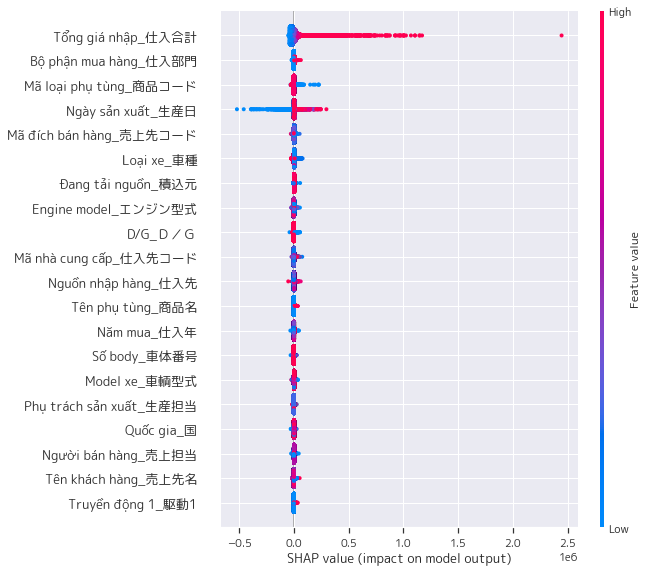

In [40]:
shap.summary_plot(vals, data_shap)

In [41]:
y_pred =  xgr.predict(x_test)
print("MAPE: ", mean_absolute_percentage_error(y_test_shap, y_pred))

MAPE:  0.15060903687781743


# MAKE MEAN DATA

# Mean sell data

In [148]:
df_mean_hybrid  = df.groupby(['Tên phụ tùng_商品名','Model xe_車輌型式','Engine model_エンジン型式'])['Đơn giá bán hàng_売上単価'].mean().reset_index(name = 'mean')
df_mean_model = df.groupby(['Tên phụ tùng_商品名','Model xe_車輌型式'])['Đơn giá bán hàng_売上単価'].mean().reset_index(name = 'mean')
df_mean_engine  = df.groupby(['Tên phụ tùng_商品名','Engine model_エンジン型式'])['Đơn giá bán hàng_売上単価'].mean().reset_index(name = 'mean')

df_mean_hybrid.to_csv('mean_data_all/hybrid_mean.csv',index=False)
df_mean_model.to_csv('mean_data_all/model_mean.csv',index = False)
df_mean_engine.to_csv('mean_data_all/engine_mean.csv',index = False)

# MAKE MEDIAN DATA

# Median Sell

In [149]:
df_median_hybrid  = df.groupby(['Tên phụ tùng_商品名','Model xe_車輌型式','Engine model_エンジン型式'])['Đơn giá bán hàng_売上単価'].median().reset_index(name = 'median')
df_median_model = df.groupby(['Tên phụ tùng_商品名','Model xe_車輌型式'])['Đơn giá bán hàng_売上単価'].median().reset_index(name = 'median')
df_median_engine  = df.groupby(['Tên phụ tùng_商品名','Engine model_エンジン型式'])['Đơn giá bán hàng_売上単価'].median().reset_index(name = 'median')

df_median_hybrid.to_csv('median_data_all/hybrid_median.csv',index=False)
df_median_model.to_csv('median_data_all/model_median.csv',index = False)
df_median_engine.to_csv('median_data_all/engine_median.csv',index = False)

# Median Auction

In [150]:
median_auction_hybrid = pd.read_csv('median_data_training/median_auction_hybrid.csv',index_col=False)

In [151]:
median_auction_model = pd.read_csv('median_data_training/median_auction_model_car.csv',index_col=False)

In [152]:
median_auction_engine = pd.read_csv('median_data_training/median_auction_engine_model.csv',index_col=False)

# ADDING FEATURE DATA

In [153]:
df_add = pd.read_csv('add_iron_gas_price_shift_back_1_month.csv',index_col=False)

# JOIN WITH MEAN DATA

In [154]:
df_mean_hybrid = pd.read_csv('mean_data_all/hybrid_mean.csv',index_col = False)
df_mean_model = pd.read_csv('mean_data_all/model_mean.csv',index_col = False)
df_mean_engine = pd.read_csv('mean_data_all/engine_mean.csv',index_col = False)

In [155]:
df_mean_hybrid.shape

(11726, 4)

In [156]:
df_auction  =  pd.read_csv('df_auction.csv',index_col= False)

df_mean_auction_hybrid = pd.read_csv("mean_data_training/mean_auction_hybrid.csv",index_col=False)
df_mean_auction_model =  pd.read_csv("mean_data_training/mean_auction_model_car.csv",index_col=False)
df_mean_auction_engine =  pd.read_csv("mean_data_training/mean_auction_engine_model.csv",index_col=False)

In [157]:
a = pd.merge(df, df_mean_hybrid, on = ['Tên phụ tùng_商品名','Model xe_車輌型式','Engine model_エンジン型式'], how = 'left')
df_join_two_mean = pd.merge(a, df_mean_auction_hybrid,on =  ['Tên phụ tùng_商品名','Model xe_車輌型式','Engine model_エンジン型式'], how = 'left' )

b = pd.merge(df,df_mean_engine, on = ['Tên phụ tùng_商品名','Engine model_エンジン型式'], how = 'left')
df_join_two_mean_engine = pd.merge(b, df_mean_auction_engine,on =  ['Tên phụ tùng_商品名','Engine model_エンジン型式'], how = 'left' )

c = pd.merge(df,df_mean_model, on = ['Tên phụ tùng_商品名','Model xe_車輌型式'], how = 'left')
df_join_two_mean_model = pd.merge(b, df_mean_auction_model,on =  ['Tên phụ tùng_商品名','Model xe_車輌型式'], how = 'left' )

# JOIN WITH MEDIAN DATA

In [158]:
d = pd.merge(df_join_two_mean, df_median_hybrid,on = ['Tên phụ tùng_商品名','Model xe_車輌型式','Engine model_エンジン型式'], how ='left')
df_join_median_hybrid = pd.merge(d, median_auction_hybrid,on = ['Tên phụ tùng_商品名','Model xe_車輌型式','Engine model_エンジン型式'], how ='left' )

e =  pd.merge(df_join_two_mean_model, df_median_model,on = ['Tên phụ tùng_商品名','Model xe_車輌型式'], how ='left')
df_join_median_model = pd.merge(e, median_auction_model ,on =  ['Tên phụ tùng_商品名','Model xe_車輌型式'], how = 'left' )

f = pd.merge(df_join_two_mean_engine, df_median_engine,on = ['Tên phụ tùng_商品名','Engine model_エンジン型式'], how ='left')
df_join_median_engine = pd.merge(f, median_auction_engine,on =  ['Tên phụ tùng_商品名','Engine model_エンジン型式'], how = 'left' )

# JOIN WITH ADD DATA

In [159]:
df_add_feat_hybrid = pd.merge(df_join_median_hybrid, df_add, on=['Năm bán hàng_売上年','Tháng bán hàng_売上月'], how = 'left')
df_add_feat_model = pd.merge(df_join_median_model, df_add, on=['Năm bán hàng_売上年','Tháng bán hàng_売上月'], how = 'left')
df_add_feat_engine = pd.merge(df_join_median_engine, df_add, on=['Năm bán hàng_売上年','Tháng bán hàng_売上月'], how = 'left')

In [4]:
# df_add_feat_hybrid.to_csv('data_training_all/add_feat_mean_median_hybrid_shift_one_month.csv',index=False)
# df_add_feat_model.to_csv('data_training_all/add_feat_mean_median_model_shift_one_month.csv',index=False)
# df_add_feat_engine.to_csv('data_training_all/add_feat_mean_median_engine_shift_one_month.csv',index=False)

df_add_feat_hybrid = pd.read_csv('data_training_all/add_feat_mean_median_hybrid_shift_one_month.csv',index_col=False)
df_add_feat_model = pd.read_csv('data_training_all/add_feat_mean_median_model_shift_one_month.csv',index_col=False)
df_add_feat_engine = pd.read_csv('data_training_all/add_feat_mean_median_engine_shift_one_month.csv',index_col=False)

# df_add_feat_hybrid = pd.read_csv('data_training_all/add_feat_mean_median_hybrid.csv',index_col=False)
# df_add_feat_model = pd.read_csv('data_training_all/add_feat_mean_median_model.csv',index_col=False)
# df_add_feat_engine = pd.read_csv('data_training_all/add_feat_mean_median_engine.csv',index_col=False)

In [5]:
df_add_feat_hybrid['Nhà sản xuất_メーカー'].isnull().sum()

2644

In [6]:
list_feature = [
                'Tên phụ tùng_商品名',
                'Model xe_車輌型式',
                'Engine model_エンジン型式',
#                 'Nhà sản xuất_メーカー',
                'Đơn giá bán hàng_売上単価',
                'Quốc gia_国',
#                 'Tổng giá nhập_仕入合計',
                'Đơn giá mua_仕入単価',
                'Tháng bán hàng_売上月',
#                  'mean',
#                  'mean_auction',
                 'median',
                 'median_auction',
#                  'Iron',
#                  'Harness',
#                  'Alumi',
#                  'New_York_Gas_Price',
#                  'US_Gulf_Gas_Price',
                 'Năm bán hàng_売上年',
               ]

In [42]:
df_best_feature = df_add_feat_hybrid[list_feature]
# df_best_feature = df_add_feat_model[list_feature]
# df_best_feature = df_add_feat_engine[list_feature]


for col in df_best_feature.columns[df_best_feature.dtypes == object]:
    print(col, df_best_feature[col].nunique())
    df_best_feature[col] = df_best_feature[col].fillna("unknown")
    df_best_feature[col] = le.fit_transform(df_best_feature[col].values)

for col in df_best_feature.columns[df_best_feature.dtypes == 'float64']:
#     df_best_feature.fillna(df_best_feature[col].mean(), inplace=True)
      df_best_feature.fillna(0, inplace=True)

Tên phụ tùng_商品名 61
Model xe_車輌型式 4108
Engine model_エンジン型式 1440
Quốc gia_国 55


In [43]:
df_best_feature

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Đơn giá bán hàng_売上単価,Quốc gia_国,Đơn giá mua_仕入単価,Tháng bán hàng_売上月,median,median_auction,Năm bán hàng_売上年
0,13,4107,232,35000.0,50,25000.00,2,0.0,0.0,2010
1,13,4107,1383,40000.0,52,50000.00,7,0.0,0.0,2009
2,13,4107,323,22000.0,3,20000.00,1,0.0,0.0,2009
3,13,235,475,27000.0,3,23484.00,1,28000.0,0.0,2009
4,13,4107,260,66220.0,35,52381.00,3,0.0,0.0,2010
...,...,...,...,...,...,...,...,...,...,...
244314,27,1411,1434,1187.5,2,5000.00,4,0.0,0.0,2016
244315,42,800,323,170000.0,2,160312.59,9,170000.0,0.0,2016
244316,42,800,323,170000.0,2,160457.04,9,170000.0,0.0,2016
244317,42,1790,99,180000.0,2,164236.30,9,200000.0,0.0,2016


In [44]:
target = df_best_feature['Đơn giá bán hàng_売上単価']
# data = df_best_feature.drop(columns=['Thành tích bán ra_販売実績','New_York_Gas_Price','US_Gulf_Gas_Price'])
data = df_best_feature.drop(columns=['Đơn giá bán hàng_売上単価'])

In [48]:
X_train, X_test, y_train, y_test =  train_test_split(data, target, test_size= 0.3, random_state=42)
# train, test = df_best_feature[df_best_feature['Năm bán hàng_売上年'] < 2021], df_best_feature[df_best_feature['Năm bán hàng_売上年'] >= 2021 ]

X_train, y_train = train.drop(columns=['Đơn giá bán hàng_売上単価']), train['Đơn giá bán hàng_売上単価']
X_test, y_test =  test.drop(columns=['Đơn giá bán hàng_売上単価']), test['Đơn giá bán hàng_売上単価']

print("Shape X train: ", X_train.shape)
print("Shape X test: ", X_test.shape)



Shape X train:  (227878, 9)
Shape X test:  (16441, 9)


In [49]:
# mean_absolute_percentage_error(train['Đơn giá bán hàng_売上単価'], train['Tổng giá nhập_仕入合計'])

In [50]:
rmse = []
mape = []
r_squared = []
for  model,name in zip(models,names):
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
    y_pred_train = model.predict(X_train)
#     print(y_pred)
    rmse_score = mean_squared_error(y_test, y_pred,squared=False)
    mape_score = np.mean(np.abs((y_test - y_pred)/y_test)*100)
    mape_score_train = np.mean(np.abs((y_train - y_pred_train)/y_train)*100)
    
#     mape_score = mean_absolute_percentage_error(y_test,y_pred)
    print("Model Name: ", name)
    print("Test MAPE: ",mape_score)
    print("Train MAPE: ",mape_score_train)
    print("\n")
#     print(rmse_score)
    r_squared_score  = model.score(X_test,y_test)
    r_squared.append(r_squared_score)
    rmse.append(rmse_score)
    mape.append(mape_score)
    
# del model
# del mape_score
# del rmse_score

Model Name:  Gradient_Boosting
Test MAPE:  489.9398623343538
Train MAPE:  25.278451156667234


Model Name:  Decision_Tree
Test MAPE:  88.09513529000291
Train MAPE:  35.72652360582096


Model Name:  Extra_Trees
Test MAPE:  191.26899711910625
Train MAPE:  0.7163126944553418


Model Name:  Random_Forest
Test MAPE:  36.0961942628546
Train MAPE:  4.255056216579186


Model Name:  XGBoost
Test MAPE:  299.92579405700116
Train MAPE:  15.837391031365478


Model Name:  LGBMRegressor
Test MAPE:  234.79347933423043
Train MAPE:  18.755916257917903




In [ ]:
df_count = df_mean_hybrid_by_month.groupby(['Model xe_車輌型式','Engine model_エンジン型式'])['mean_by_month'].count().reset_index(name = 'count')
df_count = df_count.sort_values(by = ['count'], ascending = False)
df_count[df_count['count'] > 50]

# Handle Outlier

In [41]:
df_copy =  df_add_feat_hybrid.copy()

In [42]:
count_model =  df['Model xe_車輌型式'].value_counts()
count_model = count_model.iloc[count_model.values <= 1]
list_model_one_app = list(count_model.index)

count_engine =  df['Engine model_エンジン型式'].value_counts()
count_engine = count_engine.iloc[count_engine.values <= 1]
list_engine_one_app = list(count_engine.index)


In [43]:
count_model

1J4FY49     1
SD29MF      1
FD3HA       1
VUGNC22     1
WME45138    1
           ..
YV196495    1
C57D        1
CE95        1
WBAFA120    1
FD165B      1
Name: Model xe_車輌型式, Length: 1103, dtype: int64

In [44]:
df_remove_outlier = df_copy.drop(df_copy[df_copy.apply(lambda x: x['Model xe_車輌型式'] in list_model_one_app or x['Engine model_エンジン型式'] in list_engine_one_app, axis=1)].index)

In [45]:
df_remove_outlier

,Vị trí_ロケーション,Ngày bán hàng_売上日,Tháng bán hàng_売上月,Năm bán hàng_売上年,Ngày nhập_入力日,Đầu vào tháng_入力月,Năm đầu vào_入力年,Bộ phận bán hàng_売上部門,Người bán hàng_売上担当,Phân loại bán hàng_売上分類,...,Mã nhà cung cấp_仕入先コード,mean,mean_auction,median,median_auction,Iron,Harness,Alumi,New_York_Gas_Price,US_Gulf_Gas_Price
0,会宝産業本社,19,2,2010,19,2,2010,輸出課,四宮 学,NaN,...,408820.0,NaN,NaN,NaN,NaN,25.5,282.0,163.0,1.963,1.966
1,会宝産業本社,29,7,2009,29,7,2009,輸出課,嵩原カルソンジェイ,NaN,...,137030.0,NaN,NaN,NaN,NaN,21.2,187.0,100.0,1.750,1.705
2,会宝産業本社,14,1,2009,15,1,2009,輸出課,近藤高行,NaN,...,403050.0,NaN,NaN,NaN,NaN,21.0,90.0,70.0,1.146,1.148
3,会宝産業本社,14,1,2009,15,1,2009,輸出課,近藤高行,NaN,...,200702.0,29773.454844,NaN,28000.0,NaN,21.0,90.0,70.0,1.146,1.148
4,会宝産業本社,1,3,2010,3,3,2010,輸出課,四宮 学,NaN,...,301910.0,NaN,NaN,NaN,NaN,28.5,240.0,160.0,2.140,2.137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244314,千葉営業所,11,4,2016,29,4,2016,千葉,徳田 誠,NaN,...,1.0,NaN,NaN,NaN,NaN,17.0,220.0,155.0,1.448,1.337
244315,千葉営業所,30,9,2016,4,10,2016,千葉,徳田 誠,NaN,...,200030.0,170000.000000,NaN,170000.0,NaN,14.0,203.0,150.0,1.438,1.393
244316,千葉営業所,30,9,2016,4,10,2016,千葉,徳田 誠,NaN,...,200030.0,170000.000000,NaN,170000.0,NaN,14.0,203.0,150.0,1.438,1.393
244317,千葉営業所,30,9,2016,4,10,2016,千葉,徳田 誠,NaN,...,200030.0,188410.909091,NaN,200000.0,NaN,14.0,203.0,150.0,1.438,1.393


In [46]:
df_best_feature = df_remove_outlier[list_feature]

for col in df_best_feature.columns[df_best_feature.dtypes == object]:
    print(col, df_best_feature[col].nunique())
    df_best_feature[col] = df_best_feature[col].fillna("unknown")
    df_best_feature[col] = le.fit_transform(df_best_feature[col].values)

for col in df_best_feature.columns[df_best_feature.dtypes == 'float64']:
#     df_best_feature.fillna(df_best_feature[col].mean(), inplace=True)
      df_best_feature.fillna(0, inplace=True)

Tên phụ tùng_商品名 61
Model xe_車輌型式 3002
Engine model_エンジン型式 1187
Quốc gia_国 54


In [47]:
df_best_feature

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Đơn giá bán hàng_売上単価,Quốc gia_国,Tổng giá nhập_仕入合計,Đơn giá mua_仕入単価,Tháng bán hàng_売上月,mean,mean_auction,median,median_auction,Iron,Harness,Alumi,New_York_Gas_Price,US_Gulf_Gas_Price,Năm bán hàng_売上年
0,13,3002,195,35000.0,49,25000.00,25000.00,2,0.000000,0.0,0.0,0.0,25.5,282.0,163.0,1.963,1.966,2010
1,13,3002,1134,40000.0,51,50000.00,50000.00,7,0.000000,0.0,0.0,0.0,21.2,187.0,100.0,1.750,1.705,2009
2,13,3002,278,22000.0,3,20000.00,20000.00,1,0.000000,0.0,0.0,0.0,21.0,90.0,70.0,1.146,1.148,2009
3,13,153,404,27000.0,3,23484.00,23484.00,1,29773.454844,0.0,28000.0,0.0,21.0,90.0,70.0,1.146,1.148,2009
4,13,3002,219,66220.0,34,52381.00,52381.00,3,0.000000,0.0,0.0,0.0,28.5,240.0,160.0,2.140,2.137,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244314,27,984,1181,1187.5,2,5000.00,5000.00,4,0.000000,0.0,0.0,0.0,17.0,220.0,155.0,1.448,1.337,2016
244315,42,583,278,170000.0,2,160312.59,160312.59,9,170000.000000,0.0,170000.0,0.0,14.0,203.0,150.0,1.438,1.393,2016
244316,42,583,278,170000.0,2,160457.04,160457.04,9,170000.000000,0.0,170000.0,0.0,14.0,203.0,150.0,1.438,1.393,2016
244317,42,1272,85,180000.0,2,164236.30,164236.30,9,188410.909091,0.0,200000.0,0.0,14.0,203.0,150.0,1.438,1.393,2016


In [51]:
train, test = df_best_feature[df_best_feature['Năm bán hàng_売上年'] < 2021], df_best_feature[df_best_feature['Năm bán hàng_売上年'] >= 2021 ]

X_train, y_train = train.drop(columns=['Đơn giá bán hàng_売上単価']), train['Đơn giá bán hàng_売上単価']
X_test, y_test =  test.drop(columns=['Đơn giá bán hàng_売上単価']), test['Đơn giá bán hàng_売上単価']

print("Shape X train: ", X_train.shape)
print("Shape X test: ", X_test.shape)

Shape X train:  (226802, 17)
Shape X test:  (16262, 17)


In [53]:
test

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Đơn giá bán hàng_売上単価,Quốc gia_国,Tổng giá nhập_仕入合計,Đơn giá mua_仕入単価,Tháng bán hàng_売上月,mean,mean_auction,median,median_auction,Iron,Harness,Alumi,New_York_Gas_Price,US_Gulf_Gas_Price,Năm bán hàng_売上年
2073,42,333,136,191642.0,2,174220.00,174220.00,2,135702.166667,184561.000,144014.5,184561.0,37.0,340.0,175.0,1.761,1.686,2021
2108,42,333,136,179542.0,2,163220.00,163220.00,1,135702.166667,184561.000,144014.5,184561.0,37.5,310.0,165.0,1.563,1.500,2021
2142,42,1273,85,140000.0,10,100953.64,100953.64,3,125029.448980,100036.125,140000.0,95069.0,36.0,350.0,190.0,1.986,1.945,2021
2143,42,1273,85,140000.0,10,91190.00,91190.00,1,125029.448980,100036.125,140000.0,95069.0,37.5,310.0,165.0,1.563,1.500,2021
2144,42,1273,85,140000.0,10,94270.00,94270.00,1,125029.448980,100036.125,140000.0,95069.0,37.5,310.0,165.0,1.563,1.500,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243729,13,3002,967,82000.0,52,65000.00,65000.00,2,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,2022
243730,13,3002,584,46000.0,52,32000.00,32000.00,2,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,2022
243731,13,3002,864,31000.0,52,20000.00,20000.00,2,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,2022
243732,13,3002,61,81000.0,52,70000.00,70000.00,2,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,2022


In [52]:
rmse = []
mape = []
r_squared = []
for  model,name in zip(models,names):
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
    y_pred_train = model.predict(X_train)
#     print(y_pred)
    rmse_score = mean_squared_error(y_test, y_pred,squared=False)
    mape_score = np.mean(np.abs((y_test - y_pred)/y_test)*100)
    mape_score_train = np.mean(np.abs((y_train - y_pred_train)/y_train)*100)
    
#     mape_score = mean_absolute_percentage_error(y_test,y_pred)
    print("Model Name: ", name)
    print("Test MAPE: ",mape_score)
    print("Train MAPE: ",mape_score_train)
    print("\n")
#     print(rmse_score)
    r_squared_score  = model.score(X_test,y_test)
    r_squared.append(r_squared_score)
    rmse.append(rmse_score)
    mape.append(mape_score)

Model Name:  Extra_Trees
Test MAPE:  218.85613899247053
Train MAPE:  0.7185759861581805


Model Name:  Random_Forest
Test MAPE:  37.66424090393085
Train MAPE:  4.2202703499780405




# SPLIT DATA

# Split by Tên phụ tùng_商品名

In [105]:
group_acc =  df_add_feat_hybrid['Tên phụ tùng_商品名'].value_counts().reset_index().rename(columns = {'index':'Tên phụ tùng_商品名','Tên phụ tùng_商品名':'count'})
group_acc['percent'] = round(group_acc['count']/group_acc['count'].sum()*100,3)
group_acc


,Tên phụ tùng_商品名,count,percent
0,エンジン,206816,84.650
1,ＣＫＤ／コンプリート,15137,6.196
2,ノーズカット（個別）,11240,4.601
3,Ｒアクスル（生/Ｄ）,2691,1.101
4,ハーフカット,1681,0.688
...,...,...,...
56,Rｱｸｽﾙﾋﾞｰﾑ,1,0.000
57,トートバッグM,1,0.000
58,ステアリングホイール（ハンドルのみ）（個別）,1,0.000
59,建設機械,1,0.000


<AxesSubplot:xlabel='percent', ylabel='Tên phụ tùng_商品名'>

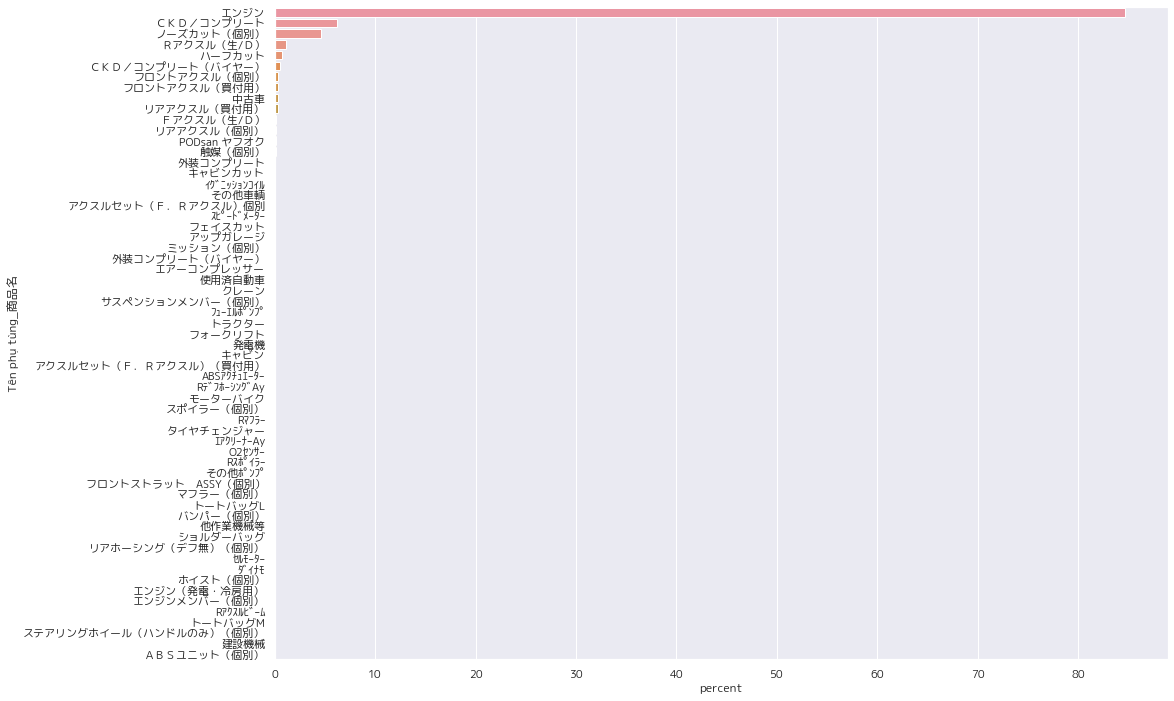

In [106]:
plt.figure(figsize=(16,12))
sns.barplot(x='percent',y='Tên phụ tùng_商品名', data = group_acc, orient='h')

In [7]:
list_best_acc = ['エンジン','ＣＫＤ／コンプリート','ノーズカット（個別）']

In [8]:
# df_best_acc =  df_add_feat_hybrid[df_add_feat_hybrid['Tên phụ tùng_商品名'].isin(list_best_acc)]
# df_best_acc =  df_add_feat_model[df_add_feat_model['Tên phụ tùng_商品名'].isin(list_best_acc)]
df_best_acc =  df_add_feat_engine[df_add_feat_engine['Tên phụ tùng_商品名'].isin(list_best_acc)]

df_best_acc

,Vị trí_ロケーション,Ngày bán hàng_売上日,Tháng bán hàng_売上月,Năm bán hàng_売上年,Ngày nhập_入力日,Đầu vào tháng_入力月,Năm đầu vào_入力年,Bộ phận bán hàng_売上部門,Người bán hàng_売上担当,Phân loại bán hàng_売上分類,...,Mã nhà cung cấp_仕入先コード,mean,mean_auction,median,median_auction,Iron,Harness,Alumi,New_York_Gas_Price,US_Gulf_Gas_Price
0,会宝産業本社,19,2,2010,19,2,2010,輸出課,四宮 学,NaN,...,408820.0,37128.496753,55714.705128,35000.0,51250.0,21.0,235.0,150.0,2.040,2.014
1,会宝産業本社,29,7,2009,29,7,2009,輸出課,嵩原カルソンジェイ,NaN,...,137030.0,65766.663078,123626.864865,60000.0,128500.0,19.0,187.0,100.0,1.906,1.889
2,会宝産業本社,14,1,2009,15,1,2009,輸出課,近藤高行,NaN,...,403050.0,36133.041619,41771.723039,35000.0,42000.0,11.0,110.0,105.0,0.956,0.930
3,会宝産業本社,14,1,2009,15,1,2009,輸出課,近藤高行,NaN,...,200702.0,37464.987388,47341.776596,35000.0,49250.0,11.0,110.0,105.0,0.956,0.930
4,会宝産業本社,1,3,2010,3,3,2010,輸出課,四宮 学,NaN,...,301910.0,76280.160494,71739.600000,75000.0,75250.0,25.5,282.0,163.0,1.963,1.966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244310,姫路集荷センター,24,4,2009,25,4,2009,姫路,山本拓也,NaN,...,231110.0,35444.874483,50500.000000,35000.0,50750.0,17.0,110.0,70.0,1.288,1.288
244311,姫路集荷センター,24,4,2009,25,4,2009,姫路,山本拓也,NaN,...,231110.0,29992.443220,24532.026455,28000.0,23000.0,17.0,110.0,70.0,1.288,1.288
244312,会宝産業本社,1,6,2009,27,6,2009,輸出課,四宮 学,NaN,...,1.0,51299.518773,61595.224138,45000.0,61155.0,19.0,180.0,90.0,1.689,1.657
244313,姫路集荷センター,24,4,2009,25,4,2009,姫路,山本拓也,NaN,...,231110.0,39271.150776,34495.750000,38000.0,33861.0,17.0,110.0,70.0,1.288,1.288


In [9]:
list_feature = [
                'Tên phụ tùng_商品名',
                'Model xe_車輌型式',
                'Engine model_エンジン型式',
#                 'Nhà sản xuất_メーカー',
                'Đơn giá bán hàng_売上単価',
                'Quốc gia_国',
#                 'Tổng giá nhập_仕入合計',
#                 'Đơn giá mua_仕入単価',
                'Tháng bán hàng_売上月',
#                  'mean',
#                  'mean_auction',
                 'median',
                 'median_auction',
#                  'Iron',
#                  'Harness',
#                  'Alumi',
#                  'New_York_Gas_Price',
#                  'US_Gulf_Gas_Price',
                 'Năm bán hàng_売上年',
               ]

In [10]:
df_best_feature = df_best_acc[list_feature]


for col in df_best_feature.columns[df_best_feature.dtypes == object]:
    print(col, df_best_feature[col].nunique())
    df_best_feature[col] = df_best_feature[col].fillna("unknown")
    df_best_feature[col] = le.fit_transform(df_best_feature[col].values)

for col in df_best_feature.columns[df_best_feature.dtypes == 'float64']:
    df_best_feature.fillna(df_best_feature[col].mean(), inplace=True)
#       df_best_feature.fillna(0, inplace=True)

# target = df_best_feature['Đơn giá bán hàng_売上単価']
# data = df_best_feature.drop(columns=['Đơn giá bán hàng_売上単価'])
# X_train, X_test, y_train, y_test =  train_test_split(data, target, test_size= 0.3, random_state=42)

train, test = df_best_feature[df_best_feature['Năm bán hàng_売上年'] < 2021], df_best_feature[df_best_feature['Năm bán hàng_売上年'] >= 2021]
X_train, y_train = train.drop(columns=['Đơn giá bán hàng_売上単価']), train['Đơn giá bán hàng_売上単価']
X_test, y_test =  test.drop(columns=['Đơn giá bán hàng_売上単価']), test['Đơn giá bán hàng_売上単価']

print("Shape X train: ", X_train.shape)
print("Shape X test: ", X_test.shape)

Tên phụ tùng_商品名 3
Model xe_車輌型式 3917
Engine model_エンジン型式 1419
Quốc gia_国 54
Shape X train:  (217844, 8)
Shape X test:  (15349, 8)


In [11]:
X_train

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Quốc gia_国,Tháng bán hàng_売上月,median,median_auction,Năm bán hàng_売上年
0,0,3916,226,49,2,35000.000000,51250.000000,2010
1,0,3916,1363,51,7,60000.000000,128500.000000,2009
2,0,3916,317,3,1,35000.000000,42000.000000,2009
3,0,227,463,3,1,35000.000000,49250.000000,2009
4,0,3916,254,34,3,75000.000000,75250.000000,2010
...,...,...,...,...,...,...,...,...
244310,0,3916,310,26,4,35000.000000,50750.000000,2009
244311,0,3916,346,26,4,28000.000000,23000.000000,2009
244312,0,3916,395,25,6,45000.000000,61155.000000,2009
244313,0,3916,918,26,4,38000.000000,33861.000000,2009


In [144]:
rmse = []
mape = []
r_squared = []
for  model,name in zip(models,names):
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
    y_pred_train = model.predict(X_train)
#     print(y_pred)
    rmse_score = mean_squared_error(y_test, y_pred,squared=False)
    rmse_score_train =  mean_squared_error(y_train, y_pred_train,squared=False)
    mape_score = np.mean(np.abs((y_test - y_pred)/y_test)*100)
    mape_score_train = np.mean(np.abs((y_train - y_pred_train)/y_train)*100)
    
#     mape_score = mean_absolute_percentage_error(y_test,y_pred)
    print("Model Name: ", name)
    print("Test MAPE: ",mape_score)
    print("Train MAPE: ",mape_score_train)
    print("Test RMSE: ", rmse_score)
    print("Train RMSE: ", rmse_score_train)
    print("\n")
#     print(rmse_score)
    r_squared_score  = model.score(X_test,y_test)
    r_squared.append(r_squared_score)
    rmse.append(rmse_score)
    mape.append(mape_score)

Model Name:  Gradient_Boosting
Test MAPE:  20.6063223460848
Train MAPE:  18.725638443568986
Test RMSE:  23348.920419270547
Train RMSE:  13337.981411219063


Model Name:  Decision_Tree
Test MAPE:  24.658518922991785
Train MAPE:  25.496567235525703
Test RMSE:  21279.780645513652
Train RMSE:  17167.306447179526


Model Name:  Extra_Trees
Test MAPE:  19.7375337222072
Train MAPE:  1.082197029267409
Test RMSE:  21237.921064824674
Train RMSE:  1464.7887574740796


Model Name:  Random_Forest
Test MAPE:  19.800813520755923
Train MAPE:  4.187205137512787
Test RMSE:  21594.156788545704
Train RMSE:  4568.78863512083


Model Name:  XGBoost
Test MAPE:  19.657683035543076
Train MAPE:  14.135995954656941
Test RMSE:  21958.237320881028
Train RMSE:  9409.299467846962


Model Name:  LGBMRegressor
Test MAPE:  19.730339593717925
Train MAPE:  15.955938100185115
Test RMSE:  24958.393659443762
Train RMSE:  11789.9634845222




# Split best acc by Model xe_車輌型式 

In [85]:
group_model =  df_best_acc['Model xe_車輌型式'].value_counts().reset_index().rename(columns = {'index':'Model xe_車輌型式','Model xe_車輌型式':'count'})
group_model['percent'] = round(group_model['count']/group_model['count'].sum()*100,3)
group_best_model = group_model[group_model['percent'] >= 0.1]

<AxesSubplot:xlabel='Model xe_車輌型式', ylabel='percent'>

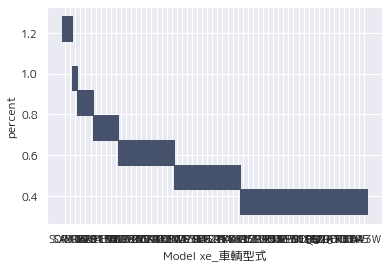

In [76]:
sns.histplot(x = 'Model xe_車輌型式',y = 'percent', data = group_model[group_model['percent'] > 0.3])

In [93]:
list(group_best_model['Model xe_車輌型式'])

['SCP10',
 'SXM10',
 'AZR60',
 'NCP20',
 'GD1',
 'EP91',
 'AE111',
 'AE110',
 'EL51',
 'AE100',
 'FB15',
 'KGC10',
 'ACR30',
 'NCP31',
 'WVWZZZ1J',
 'RF1',
 'ZNE10',
 'ACR40',
 'GX100',
 'RF2',
 'NZE121',
 'SXM15',
 'E11',
 'EXZ10',
 'NCP30',
 'WFY11',
 'AZR65',
 'SF5',
 'TCR20',
 'ST215',
 'AT211',
 'RN1',
 'RA6',
 'YXS11',
 'BH5',
 'AK12',
 'SR50',
 'DY3W',
 'KSP90',
 'JZS155',
 'ST210',
 'RB1',
 'JZS151',
 'NCP51',
 'NCP81',
 'HT51S',
 'ALWE50',
 'FN15',
 'SCP90',
 'CXR20',
 'QG10',
 'GX90',
 'NNP10',
 'JZX100',
 'EK3',
 'RD1',
 'FB14',
 'GA4',
 'BP5',
 'DW3W',
 'NCP15',
 'TC24',
 'AZ10',
 'RF3',
 'AT212',
 'LW3W',
 'MCR40',
 'M100A',
 'SR40',
 'AE115',
 'HA23S',
 'NCP25',
 'C25',
 'VFY11',
 'JZS171',
 'BZ11',
 'ACM21',
 'NCP55',
 'ZCT10',
 'RH1',
 'C11',
 'ST195',
 'WVWZZZ1H',
 'AE101',
 'K11',
 'SV40',
 'NT30',
 'ST202',
 'VY11',
 'NCP60',
 'VY12',
 'UCF21',
 'AE114',
 'NCP35',
 'WVWZZZ1K',
 'Z25A',
 'NNP11',
 'MA34S',
 'CS5W',
 'RN3',
 'MCV21',
 'L500S',
 'PC24',
 'JZX90',
 'ZNE1

In [94]:
df_best_acc_model  = df_best_acc[df_best_acc.apply(lambda x: x['Model xe_車輌型式'] in list(group_best_model['Model xe_車輌型式']),axis=1)]

In [95]:
df_best_acc_model

,Vị trí_ロケーション,Ngày bán hàng_売上日,Tháng bán hàng_売上月,Năm bán hàng_売上年,Ngày nhập_入力日,Đầu vào tháng_入力月,Năm đầu vào_入力年,Bộ phận bán hàng_売上部門,Người bán hàng_売上担当,Phân loại bán hàng_売上分類,...,Mã nhà cung cấp_仕入先コード,mean,mean_auction,median,median_auction,Iron,Harness,Alumi,New_York_Gas_Price,US_Gulf_Gas_Price
57,会宝産業本社,14,1,2015,14,1,2015,輸出課,引合い管理,NaN,...,505740.0,11230.225434,4406.428571,12000.000,4500.0,20.0,290.0,190.0,1.364,1.271
59,会宝産業本社,25,12,2014,25,12,2014,輸出課,バイヤー管理,NaN,...,313910.0,5000.000000,NaN,5000.000,NaN,23.5,315.0,190.0,1.683,1.423
1328,会宝産業本社,1,6,2009,27,6,2009,輸出課,四宮 学,NaN,...,1.0,28838.476545,68500.000000,29500.000,68500.0,19.0,187.0,100.0,1.906,1.889
2167,会宝産業本社,10,12,2015,14,12,2015,輸出課,引合い管理,NaN,...,620560.0,10045.076923,6415.333333,10000.000,4246.0,11.5,220.0,160.0,1.276,1.181
2178,会宝産業本社,18,8,2017,21,8,2017,輸出課,引合い管理,NaN,...,302010.0,35955.172414,68981.384615,35000.000,69442.0,19.5,280.0,175.0,1.688,1.638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243571,千葉営業所,17,1,2022,17,1,2022,アライアンス部2,千葉輸出,NaN,...,618200.0,12125.000000,22478.666667,13000.000,21000.0,NaN,NaN,NaN,NaN,NaN
243588,千葉営業所,26,1,2022,31,1,2022,アライアンス部2,千葉入札会,国内,...,517220.0,27101.210909,25716.993333,28000.000,25133.5,NaN,NaN,NaN,NaN,NaN
243598,千葉営業所,26,1,2022,26,1,2022,アライアンス部2,千葉入札会,NaN,...,517220.0,28405.489255,52687.500000,23899.995,53750.0,NaN,NaN,NaN,NaN,NaN
243628,千葉営業所,8,2,2022,7,2,2022,アライアンス部2,千葉輸出,NaN,...,118100.0,26845.024029,53625.000000,28000.000,53250.0,NaN,NaN,NaN,NaN,NaN


In [98]:
df_best_feature

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Đơn giá bán hàng_売上単価,Quốc gia_国,Tổng giá nhập_仕入合計,Đơn giá mua_仕入単価,Tháng bán hàng_売上月,mean,mean_auction,median,median_auction,Iron,Harness,Alumi,New_York_Gas_Price,US_Gulf_Gas_Price,Năm bán hàng_売上年
57,1,11,76,8000.0,47,4000.000000,4000.000000,1,11230.225434,4406.428571,12000.000,4500.0,20.0,290.0,190.0,1.364,1.271,2015
59,1,94,180,5000.0,2,589.000000,589.000000,12,5000.000000,0.000000,5000.000,0.0,23.5,315.0,190.0,1.683,1.423,2014
1328,0,196,41,24999.3,23,40160.000000,40160.000000,6,28838.476545,68500.000000,29500.000,68500.0,19.0,187.0,100.0,1.906,1.889,2009
2167,1,50,69,12000.0,25,607.500000,607.500000,12,10045.076923,6415.333333,10000.000,4246.0,11.5,220.0,160.0,1.276,1.181,2015
2178,0,48,61,35000.0,47,29909.407924,29909.407924,8,35955.172414,68981.384615,35000.000,69442.0,19.5,280.0,175.0,1.688,1.638,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243571,1,141,30,10000.0,47,5000.000000,5000.000000,1,12125.000000,22478.666667,13000.000,21000.0,0.0,0.0,0.0,0.000,0.000,2022
243588,0,128,17,36500.0,50,30000.000000,30000.000000,1,27101.210909,25716.993333,28000.000,25133.5,0.0,0.0,0.0,0.000,0.000,2022
243598,0,77,127,70000.0,50,52000.000000,52000.000000,1,28405.489255,52687.500000,23899.995,53750.0,0.0,0.0,0.0,0.000,0.000,2022
243628,0,191,41,93000.0,40,70000.000000,70000.000000,2,26845.024029,53625.000000,28000.000,53250.0,0.0,0.0,0.0,0.000,0.000,2022


In [108]:
df_best_feature = df_best_acc_model[list_feature]

for col in df_best_feature.columns[df_best_feature.dtypes == object]:
    print(col, df_best_feature[col].nunique())
    df_best_feature[col] = df_best_feature[col].fillna("unknown")
    df_best_feature[col] = le.fit_transform(df_best_feature[col].values)

for col in df_best_feature.columns[df_best_feature.dtypes == 'float64']:
#     df_best_feature.fillna(df_best_feature[col].mean(), inplace=True)
      df_best_feature.fillna(0, inplace=True)


train, test = df_best_feature[df_best_feature['Năm bán hàng_売上年'] < 2020], df_best_feature[df_best_feature['Năm bán hàng_売上年'] >= 2020 ]

X_train, y_train = train.drop(columns=['Đơn giá bán hàng_売上単価']), train['Đơn giá bán hàng_売上単価']
X_test, y_test =  test.drop(columns=['Đơn giá bán hàng_売上単価']), test['Đơn giá bán hàng_売上単価']

print("Shape X train: ", X_train.shape)
print("Shape X test: ", X_test.shape)

NameError: name 'df_best_acc_model' is not defined

In [97]:
rmse = []
mape = []
r_squared = []
for  model,name in zip(models,names):
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
    y_pred_train = model.predict(X_train)
#     print(y_pred)
    rmse_score = mean_squared_error(y_test, y_pred,squared=False)
    mape_score = np.mean(np.abs((y_test - y_pred)/y_test)*100)
    mape_score_train = np.mean(np.abs((y_train - y_pred_train)/y_train)*100)
    
#     mape_score = mean_absolute_percentage_error(y_test,y_pred)
    print("Model Name: ", name)
    print("Test MAPE: ",mape_score)
    print("Train MAPE: ",mape_score_train)
    print("\n")
#     print(rmse_score)
    r_squared_score  = model.score(X_test,y_test)
    r_squared.append(r_squared_score)
    rmse.append(rmse_score)
    mape.append(mape_score)

Model Name:  Extra_Trees
Test MAPE:  24.79418238731345
Train MAPE:  0.4121048559793849


Model Name:  Random_Forest
Test MAPE:  25.49870620615563
Train MAPE:  4.5045897992713835




# CHECK NULL MODEL AND ENGINE

# Check null model

In [380]:
df_model_not_null = df[df['Model xe_車輌型式'].notna().values == True]
df_model_null = df[df['Model xe_車輌型式'].notna().values == False]
# df_engine_not_null =  df[df['Engine model_エンジン型式'].notna().values == True]

In [382]:
df_model_not_null['Tên phụ tùng_商品名'].value_counts()

エンジン                  79875
ＣＫＤ／コンプリート            14816
ノーズカット（個別）            10309
Ｒアクスル（生/Ｄ）             2688
ハーフカット                 1523
ＣＫＤ／コンプリート（バイヤー）       1293
フロントアクスル（個別）            717
中古車                     700
Ｆアクスル（生/Ｄ）              434
リアアクスル（個別）              374
リアアクスル（買付用）             226
フロントアクスル（買付用）           225
外装コンプリート                192
キャビンカット                 127
フェイスカット                  51
外装コンプリート（バイヤー）           47
ミッション（個別）                45
アクスルセット（Ｆ．Ｒアクスル）個別       42
使用済自動車                   29
その他車輌                    26
キャビン                      8
触媒（個別）                    2
リアホーシング（デフ無）（個別）          1
エンジン（発電・冷房用）              1
フロントストラット　ASSY（個別）        1
発電機                       1
クレーン                      1
Name: Tên phụ tùng_商品名, dtype: int64

In [ ]:
df_model_not_null.val

In [374]:
df_best_feature = df_model_not_null[list_feature]

for col in df_best_feature.columns[df_best_feature.dtypes == object]:
    print(col, df_best_feature[col].nunique())
    df_best_feature[col] = df_best_feature[col].fillna("unknown")
    df_best_feature[col] = le.fit_transform(df_best_feature[col].values)

for col in df_best_feature.columns[df_best_feature.dtypes == 'float64']:
#     df_best_feature.fillna(df_best_feature[col].mean(), inplace=True)
      df_best_feature.fillna(0, inplace=True)


train, test = df_best_feature[df_best_feature['Năm bán hàng_売上年'] < 2020], df_best_feature[df_best_feature['Năm bán hàng_売上年'] >= 2020 ]

X_train, y_train = train.drop(columns=['Đơn giá bán hàng_売上単価']), train['Đơn giá bán hàng_売上単価']
X_test, y_test =  test.drop(columns=['Đơn giá bán hàng_売上単価']), test['Đơn giá bán hàng_売上単価']

print("Shape X train: ", X_train.shape)
print("Shape X test: ", X_test.shape)

Tên phụ tùng_商品名 27
Model xe_車輌型式 4108
Engine model_エンジン型式 1260
Quốc gia_国 53
Shape X train:  (99800, 15)
Shape X test:  (13954, 15)


In [375]:
rmse = []
mape = []
r_squared = []
for  model,name in zip(models,names):
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
    y_pred_train = model.predict(X_train)
#     print(y_pred)
    rmse_score = mean_squared_error(y_test, y_pred,squared=False)
    mape_score = np.mean(np.abs((y_test - y_pred)/y_test)*100)
    mape_score_train = np.mean(np.abs((y_train - y_pred_train)/y_train)*100)
    
#     mape_score = mean_absolute_percentage_error(y_test,y_pred)
    print("Model Name: ", name)
    print("Test MAPE: ",mape_score)
    print("Train MAPE: ",mape_score_train)
    print("\n")
#     print(rmse_score)
    r_squared_score  = model.score(X_test,y_test)
    r_squared.append(r_squared_score)
    rmse.append(rmse_score)
    mape.append(mape_score)

Model Name:  Extra_Trees
Test MAPE:  25.48922640614707
Train MAPE:  0.2863503119507157


Model Name:  Random_Forest
Test MAPE:  26.919223865979458
Train MAPE:  5.272801225607473




# Vector Auto Regression

In [424]:
df_best_feature.columns

Index(['Tên phụ tùng_商品名', 'Model xe_車輌型式', 'Engine model_エンジン型式',
       'Đơn giá bán hàng_売上単価', 'Quốc gia_国', 'Đơn giá mua_仕入単価',
       'Tháng bán hàng_売上月', 'mean', 'median', 'median_auction', 'Iron',
       'Harness', 'Alumi', 'New_York_Gas_Price', 'US_Gulf_Gas_Price',
       'Năm bán hàng_売上年'],
      dtype='object')

In [429]:
group_by_month = df_add_feat_hybrid.groupby(['Tên phụ tùng_商品名','Model xe_車輌型式', 'Engine model_エンジン型式'])['Đơn giá bán hàng_売上単価'].count().reset_index(name = 'count').sort_values(by = ['count'],ascending = False)
group_by_month.head(20)

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,count
290,エンジン,AZR60,1AZ-FSE,953
2284,エンジン,NCP20,2NZ-FE,831
1175,エンジン,GD1,L13A,767
932,エンジン,EL51,4E-FE,733
960,エンジン,EP91,4E-FE,721
2782,エンジン,SCP10,1SZ-FE,698
159,エンジン,ACR30,2AZ-FE,689
2289,エンジン,NCP31,1NZ-FE,689
1752,エンジン,KGC10,1KR-FE,672
2569,エンジン,RF1,B20B,628


In [10]:
list_much_count_model = ['AZR60','NCP20','GD1','EL51','EP91']
list_much_count_engine = ['1AZ-FSE','2NZ-FE','L13A','4E-FE', '4E-FE']  

In [11]:
for model, engine in zip(list_much_count_model, list_much_count_engine ):
    
    globals()[f'df_{model}_{engine.replace("-","")}'] = df_add_feat_hybrid[(df_add_feat_hybrid ['Model xe_車輌型式'] == model) & (df_add_feat_hybrid['Engine model_エンジン型式'] == engine)]
    globals()[f'df_{model}_{engine.replace("-","")}']['date_time'] =  globals()[f'df_{model}_{engine.replace("-","")}']['Tháng bán hàng_売上月'].astype(str)  + "/" + globals()[f'df_{model}_{engine.replace("-","")}']['Năm bán hàng_売上年'].astype(str)
    globals()[f'df_{model}_{engine.replace("-","")}']['date_time']  = pd.to_datetime(globals()[f'df_{model}_{engine.replace("-","")}']['date_time'], format= "%m/%Y")  
    globals()[f'df_{model}_{engine.replace("-","")}'] = globals()[f'df_{model}_{engine.replace("-","")}'].sort_values(by = ['date_time'])
    
    if 'date_time' in list_feature:
       globals()[f'df_{model}_{engine.replace("-","")}_best_features'] = globals()[f'df_{model}_{engine.replace("-","")}'][list_feature] 
    else:
       globals()[f'df_{model}_{engine.replace("-","")}_best_features'] = globals()[f'df_{model}_{engine.replace("-","")}'][list_feature + ['date_time']]
    
    globals()[f'df_{model}_{engine.replace("-","")}_best_features_numeric'] = globals()[f'df_{model}_{engine.replace("-","")}_best_features'].drop(columns = [col for col in globals()[f'df_{model}_{engine.replace("-","")}_best_features'].columns[(globals()[f'df_{model}_{engine.replace("-","")}_best_features'].dtypes == 'object')]])
    
    globals()[f'df_{model}_{engine.replace("-","")}_mean_by_month'] = globals()[f'df_{model}_{engine.replace("-","")}'].groupby(['date_time'])['Đơn giá bán hàng_売上単価'].mean()
    globals()[f'df_{model}_{engine.replace("-","")}_median_by_month'] = globals()[f'df_{model}_{engine.replace("-","")}'].groupby(['date_time'])['Đơn giá bán hàng_売上単価'].median()

Test RMSE: 12403.414
Test MAPE: 0.246


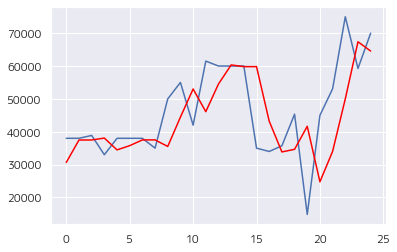

Test RMSE: 18317.242
Test MAPE: 0.390


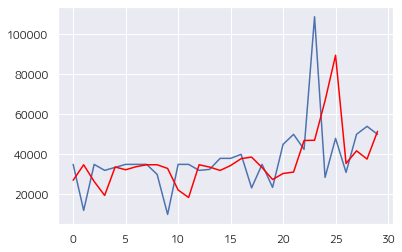

Test RMSE: 3281.659
Test MAPE: 0.123


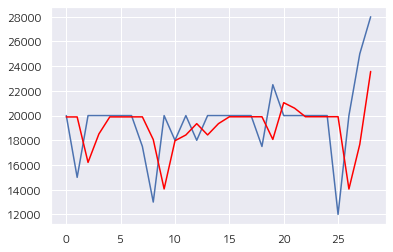

Test RMSE: 10859.228
Test MAPE: 0.193


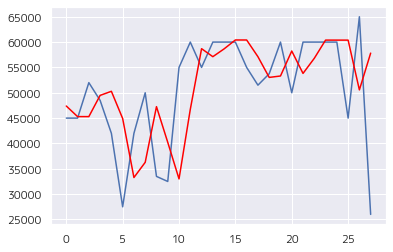

Test RMSE: 29562.037
Test MAPE: 0.353


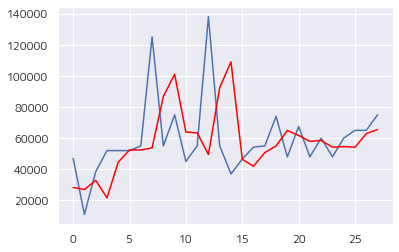

In [10]:
# X = np.log(df_GX100_1GFE_sum_by_month).values
for model, engine in zip(list_much_count_model, list_much_count_engine ):
    X = globals()[f'df_{model}_{engine.replace("-","")}_median_by_month'].values
    size = int(len(X) * 0.8)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=(1,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
#         print('predicted=%f, expected=%f' % (yhat, obs))
    # evaluate forecasts

    rmse = mean_squared_error(test, predictions,squared=False)
    mape = mean_absolute_percentage_error(test, predictions)

    # rmse = mean_squared_error(np.exp(test), np.exp(predictions),squared=False)
    # mape = mean_absolute_percentage_error(np.exp(test), np.exp(predictions))
    print('Test RMSE: %.3f' % rmse)
    print('Test MAPE: %.3f' % mape)
    # plot forecasts against actual outcomes
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.show()

In [495]:
df_AZR60_1AZFSE_best_features_numeric

,Đơn giá bán hàng_売上単価,Tổng giá nhập_仕入合計,Đơn giá mua_仕入単価,Tháng bán hàng_売上月,mean,mean_auction,median,median_auction,Iron,Harness,Alumi,New_York_Gas_Price,US_Gulf_Gas_Price,Năm bán hàng_売上年,date_time
42805,75000.0,14000.000000,14000.000000,3,35476.247723,39507.632953,35000.0,36285.0,28.5,240.0,160.0,2.140,2.137,2010,2010-03-01
166948,70000.0,70000.000000,70000.000000,4,35476.247723,39507.632953,35000.0,36285.0,35.0,290.0,184.0,2.227,2.191,2010,2010-04-01
46068,320000.0,377653.000000,377653.000000,7,182861.111111,NaN,200000.0,NaN,26.5,217.0,158.0,1.995,1.973,2010,2010-07-01
50078,220000.0,160606.000000,160606.000000,12,182861.111111,NaN,200000.0,NaN,27.5,250.0,160.0,2.389,2.310,2010,2010-12-01
50102,74700.0,13440.000000,13440.000000,12,35476.247723,39507.632953,35000.0,36285.0,27.5,250.0,160.0,2.389,2.310,2010,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145448,73500.0,16016.000000,16016.000000,1,35476.247723,39507.632953,35000.0,36285.0,NaN,NaN,NaN,NaN,NaN,2022,2022-01-01
143847,32754.0,29776.540000,29776.540000,1,35476.247723,39507.632953,35000.0,36285.0,NaN,NaN,NaN,NaN,NaN,2022,2022-01-01
150598,75000.0,60000.000000,60000.000000,1,35476.247723,39507.632953,35000.0,36285.0,NaN,NaN,NaN,NaN,NaN,2022,2022-01-01
145484,65000.0,58098.753671,58098.753671,2,35476.247723,39507.632953,35000.0,36285.0,NaN,NaN,NaN,NaN,NaN,2022,2022-02-01


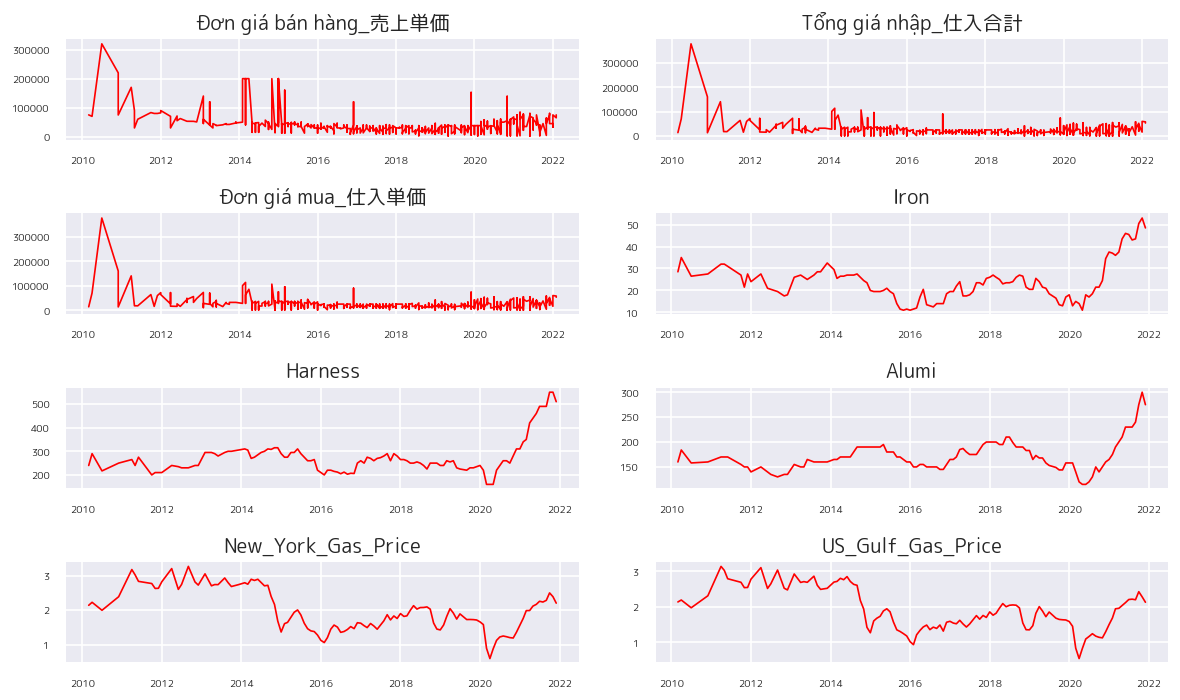

In [11]:
num_data =  df_AZR60_1AZFSE_best_features_numeric.drop(columns=['Tháng bán hàng_売上月','mean','mean_auction','median','median_auction','Năm bán hàng_売上年'])
num_data.set_index('date_time',inplace=True)
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = num_data[num_data.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(num_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();   

In [13]:
# for col in num_data.columns[num_data.dtypes == object]:
#     print(col, df_best_feature[col].nunique())
#     df_best_feature[col] = df_best_feature[col].fillna("unknown")
#     df_best_feature[col] = le.fit_transform(df_best_feature[col].values)

for col in num_data.columns[num_data.dtypes == 'float64']:
#     df_best_feature.fillna(df_best_feature[col].mean(), inplace=True)
      num_data.fillna(0, inplace=True)


In [85]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(num_data, variables = num_data.columns) 

,Đơn giá bán hàng_売上単価_x,Tổng giá nhập_仕入合計_x,Đơn giá mua_仕入単価_x,Iron_x,Harness_x,Alumi_x,New_York_Gas_Price_x,US_Gulf_Gas_Price_x
Đơn giá bán hàng_売上単価_y,1.0000,0.0000,0.0000,0.0010,0.0050,0.1408,0.0001,0.0007
Tổng giá nhập_仕入合計_y,0.0017,1.0000,1.0000,0.0000,0.0000,0.0004,0.0000,0.0000
Đơn giá mua_仕入単価_y,0.0017,1.0000,1.0000,0.0000,0.0000,0.0004,0.0000,0.0000
Iron_y,0.1006,0.0006,0.0006,1.0000,0.0082,0.0000,0.2521,0.1888
Harness_y,0.2959,0.0067,0.0067,0.4902,1.0000,0.0000,0.4732,0.4464
Alumi_y,0.2018,0.0384,0.0384,0.7700,0.6250,1.0000,0.3130,0.2958
New_York_Gas_Price_y,0.0023,0.0000,0.0000,0.0005,0.0000,0.0000,1.0000,0.0601
US_Gulf_Gas_Price_y,0.0013,0.0000,0.0000,0.0006,0.0000,0.0000,0.1295,1.0000


In [94]:
df_train, df_test = num_data[:'2020-01'], num_data['2020-01':]
print(df_train.shape) 
print(df_test.shape)

(809, 8)
(219, 8)


In [95]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

def adjust(val, length= 6): return str(val).ljust(length)


In [96]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Đơn giá bán hàng_売上単価" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.1833
 No. Lags Chosen       = 18
 Critical value 1%     = -3.439
 Critical value 5%     = -2.865
 Critical value 10%    = -2.569
 => P-Value = 0.0007. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Tổng giá nhập_仕入合計" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.0176
 No. Lags Chosen       = 14
 Critical value 1%     = -3.439
 Critical value 5%     = -2.865
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Đơn giá mua_仕入単価" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root

In [97]:
df_differenced = df_train.diff().dropna()
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Đơn giá bán hàng_売上単価" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.3279
 No. Lags Chosen       = 17
 Critical value 1%     = -3.439
 Critical value 5%     = -2.865
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Tổng giá nhập_仕入合計" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.9346
 No. Lags Chosen       = 21
 Critical value 1%     = -3.439
 Critical value 5%     = -2.865
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Đơn giá mua_仕入単価" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root.

In [98]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  12.849132343858633
BIC :  13.267867541027698
FPE :  380461.2997832595
HQIC:  13.00992530662517 

Lag Order = 2


LinAlgError: 3-th leading minor of the array is not positive definite

In [101]:
model_fitted  = model.fit(1)
model_fitted .summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 16, Feb, 2022
Time:                     14:49:44
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    13.2679
Nobs:                     807.000    HQIC:                   13.0099
Log likelihood:          -14273.3    FPE:                    380461.
AIC:                      12.8491    Det(Omega_mle):         0.00000
--------------------------------------------------------------------
Results for equation Đơn giá bán hàng_売上単価
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                          -71.780085       967.075068           -0.074           0.941
L1.Đơn giá bán hàng_売上単価        -0.469908         0.024229          -19.394           0.000


In [102]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(num_data.columns, out):
    print(adjust(col), ':', round(val, 2))

Đơn giá bán hàng_売上単価 : 2.16
Tổng giá nhập_仕入合計 : 2.14
Đơn giá mua_仕入単価 : 2.14
Iron   : 1.83
Harness : 1.75
Alumi  : 1.74
New_York_Gas_Price : 1.98
US_Gulf_Gas_Price : 1.99


In [103]:
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

1


array([[16583.        , -4409.37657091, -4409.37657091,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ]])

In [104]:
fc = model_fitted.forecast(y=forecast_input, steps = df_test.shape[0])
df_forecast = pd.DataFrame(fc, index=df_test.index, columns=df_test.columns + '_2d')
df_forecast

,Đơn giá bán hàng_売上単価_2d,Tổng giá nhập_仕入合計_2d,Đơn giá mua_仕入単価_2d,Iron_2d,Harness_2d,Alumi_2d,New_York_Gas_Price_2d,US_Gulf_Gas_Price_2d
date_time,,,,,,,,
2020-01-01,-9184.798916,-2001.787738,-2001.787738,0.029569,-0.208057,0.206258,-0.000530,-0.000800
2020-01-01,3562.322736,1691.485280,1691.485280,-0.035168,0.044742,-0.081543,-0.000548,-0.000139
2020-01-01,-1260.191078,-927.645834,-927.645834,-0.018568,-0.091546,-0.024065,-0.000833,-0.001072
2020-01-01,165.735470,142.464084,142.464084,-0.017402,-0.017142,-0.019683,-0.000434,-0.000429
2020-01-01,-145.914194,-172.961168,-172.961168,-0.020178,-0.053285,-0.029313,-0.000667,-0.000731
...,...,...,...,...,...,...,...,...
2022-01-01,-108.733632,-116.450941,-116.450941,-0.019157,-0.042377,-0.025691,-0.000595,-0.000646
2022-01-01,-108.733632,-116.450941,-116.450941,-0.019157,-0.042377,-0.025691,-0.000595,-0.000646
2022-01-01,-108.733632,-116.450941,-116.450941,-0.019157,-0.042377,-0.025691,-0.000595,-0.000646


In [105]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [106]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.columns
df_results.loc[:, ['Đơn giá bán hàng_売上単価_forecast', 'Tổng giá nhập_仕入合計_forecast', 'Đơn giá mua_仕入単価_forecast', 'Iron_forecast', 'Harness_forecast',
                   'Alumi_forecast', 'New_York_Gas_Price_forecast', 'US_Gulf_Gas_Price_forecast']]

,Đơn giá bán hàng_売上単価_forecast,Tổng giá nhập_仕入合計_forecast,Đơn giá mua_仕入単価_forecast,Iron_forecast,Harness_forecast,Alumi_forecast,New_York_Gas_Price_forecast,US_Gulf_Gas_Price_forecast
date_time,,,,,,,,
2020-01-01,45398.201084,8.649489e+03,8.649489e+03,18.029569,239.791943,158.206258,1.657470,1.586200
2020-01-01,56358.724905,3.929810e+03,3.929810e+03,18.023971,239.628628,158.330974,1.656392,1.585261
2020-01-01,66059.057647,-1.717515e+03,-1.717515e+03,17.999805,239.373767,158.431624,1.654482,1.583250
2020-01-01,75925.125860,-7.222376e+03,-7.222376e+03,17.958237,239.101763,158.512591,1.652137,1.580811
2020-01-01,85645.279878,-1.290020e+04,-1.290020e+04,17.896492,238.776474,158.564245,1.649124,1.577641
...,...,...,...,...,...,...,...,...
2022-01-01,-282461.762425,-3.783995e+06,-3.783995e+06,-419.440324,-767.765552,-399.548536,-12.169579,-13.404965
2022-01-01,-295686.037909,-3.814238e+06,-3.814238e+06,-423.543973,-777.029388,-404.916608,-12.298192,-13.544507
2022-01-01,-309019.047026,-3.844598e+06,-3.844598e+06,-427.666780,-786.335600,-410.310372,-12.427401,-13.684696


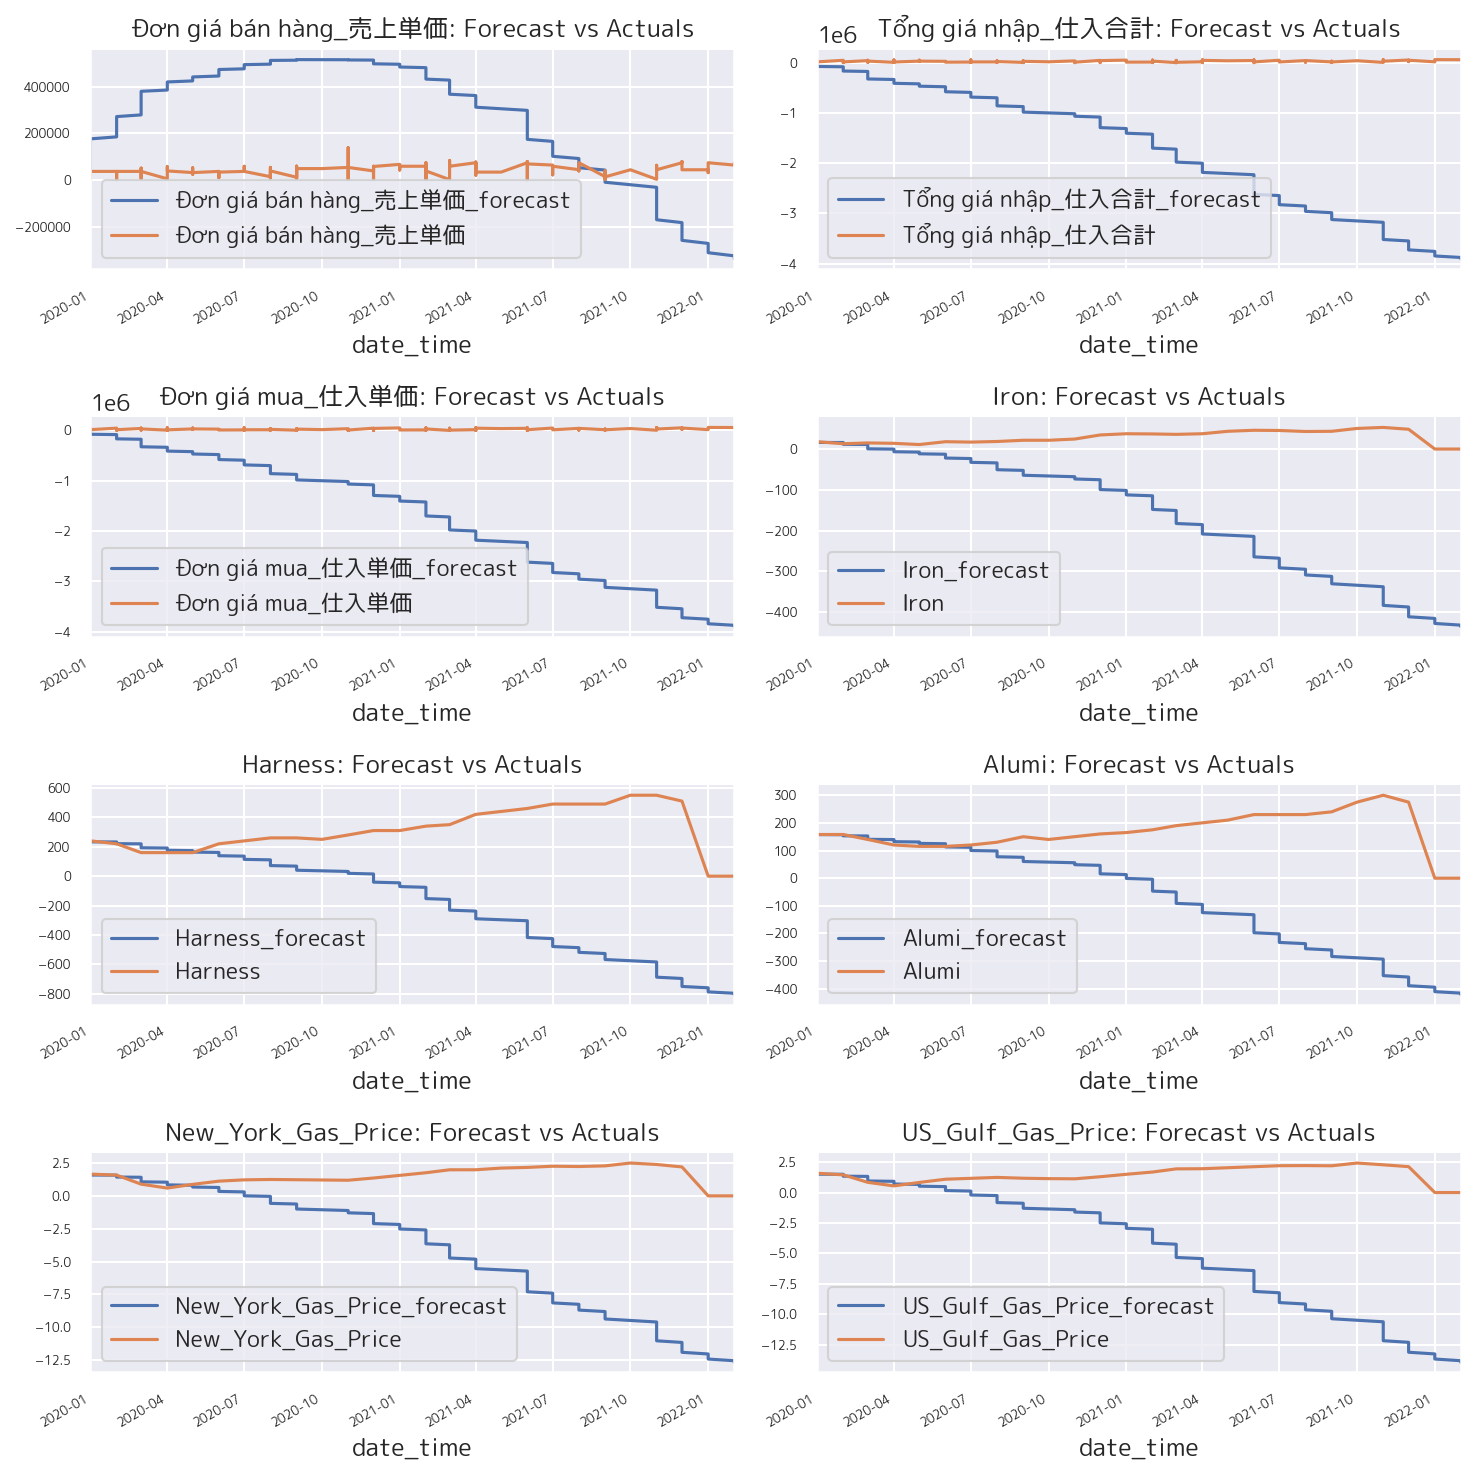

In [107]:
fig, axes = plt.subplots(nrows=int(len(num_data.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(num_data.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col]['2020-01':].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [108]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: Đơn giá bán hàng_売上単価_forecast')
accuracy_prod = forecast_accuracy(df_results['Đơn giá bán hàng_売上単価_forecast'].values, df_test['Đơn giá bán hàng_売上単価'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Đơn giá bán hàng_売上単価_forecast
mape   :  15.6711
me     :  242624.9593
mae    :  299058.2255
mpe    :  14.5584
rmse   :  332041.1781
corr   :  -0.0931
minmax :  1.2896


# Multivariate Time Series LSTM

In [114]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [115]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(num_data)

n_hours = 3
n_features = 8
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed.shape)

(1010, 32)


In [124]:
values = reframed.values
train = values[:700, :]
test = values[700:, :]

n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)


# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(700, 24) 700 (700,)
(700, 3, 8) (700,) (310, 3, 8) (310,)


Epoch 1/50
10/10 - 1s - loss: 38.8241 - mape: 39.1046 - val_loss: 169951.0625 - val_mape: 146359.0312
Epoch 2/50
10/10 - 0s - loss: 54.2943 - mape: 54.0347 - val_loss: 387581.2188 - val_mape: 333760.8125
Epoch 3/50
10/10 - 0s - loss: 54.5644 - mape: 54.2959 - val_loss: 698931.5000 - val_mape: 601865.4375
Epoch 4/50
10/10 - 0s - loss: 44.8542 - mape: 44.8593 - val_loss: 319733.7500 - val_mape: 275336.8125
Epoch 5/50
10/10 - 0s - loss: 54.8533 - mape: 54.5817 - val_loss: 582969.0625 - val_mape: 502009.3125
Epoch 6/50
10/10 - 0s - loss: 45.5113 - mape: 45.4954 - val_loss: 358845.4062 - val_mape: 309015.6875
Epoch 7/50
10/10 - 0s - loss: 52.3245 - mape: 52.1257 - val_loss: 529193.5625 - val_mape: 455702.6875
Epoch 8/50
10/10 - 0s - loss: 43.9612 - mape: 43.9881 - val_loss: 369042.6250 - val_mape: 317796.2812
Epoch 9/50
10/10 - 0s - loss: 49.1714 - mape: 49.0577 - val_loss: 519624.5625 - val_mape: 447462.5938
Epoch 10/50
10/10 - 0s - loss: 41.6963 - mape: 41.7861 - val_loss: 380677.4062 - v

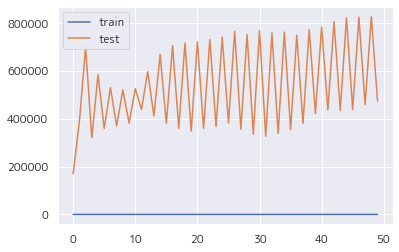

In [128]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mape', optimizer='adam',metrics=[tf.keras.losses.MeanAbsolutePercentageError(name='mape')])
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Prophet Net

In [81]:
from fbprophet import Prophet
model = Prophet()
# fit the model
model.fit(df_AZR60_1AZFSE_median_by_month.reset_index().rename(columns={'date_time':'ds','Đơn giá bán hàng_売上単価':'y'}))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [82]:
df_AZR60_1AZFSE_median_by_month.reset_index()

,date_time,Đơn giá bán hàng_売上単価
0,2010-03-01,75000.0
1,2010-04-01,70000.0
2,2010-07-01,320000.0
3,2010-12-01,147350.0
4,2011-04-01,170000.0
...,...,...
116,2021-10-01,45000.0
117,2021-11-01,53068.0
118,2021-12-01,75000.0
119,2022-01-01,59250.0


<class 'pandas.core.frame.DataFrame'>
           ds          yhat    yhat_lower    yhat_upper
0  2022-01-01  39492.950672   1723.199903  76856.793707
1  2022-02-01  37010.236844  -1112.354471  76086.078832
2  2022-03-01  50181.697901  13278.860952  90213.397085
3  2022-04-01  51540.798718  12064.471634  89678.216794
4  2022-05-01  26152.683215 -14615.632027  64866.641799
5  2022-06-01  27057.932493 -11719.253837  63898.529232
6  2022-07-01  53835.624947  17270.744629  90997.617930
7  2022-08-01  30484.879683  -6739.137222  68488.521488
8  2022-09-01  26356.495135 -10741.670116  61454.165850
9  2022-10-01  34394.710293   -953.748370  75071.649665
10 2022-11-01  40533.911748   4001.986909  83180.997522
11 2022-12-01  38007.180855   -133.542765  76242.392346


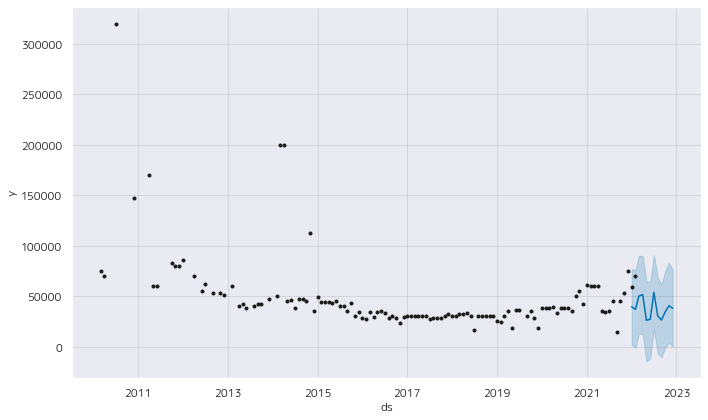

In [85]:
future = list()
for i in range(1, 13):
	date = '2022-%02d' % i
	future.append([date])

future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
print(type(future))
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# plot forecast
model.plot(forecast)
plt.show()

In [23]:
y_true = df_AZR60_1AZFSE_mean_by_month['2020-01':'2020-12'].values
y_pred = forecast['yhat'].values
mape = mean_absolute_percentage_error(y_true, y_pred)
print('MAPE: %.3f' % mape)

MAPE: 0.284


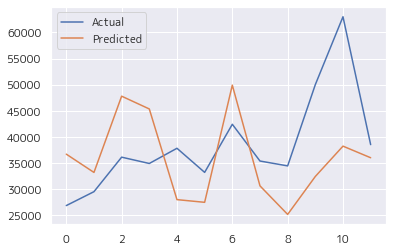

In [21]:
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

# COMPARE TIME SERIES

In [9]:
df_count = df_add_feat_hybrid.groupby(['Tên phụ tùng_商品名','Model xe_車輌型式','Engine model_エンジン型式'])['Đơn giá bán hàng_売上単価'].count().reset_index(name = 'count')
df_count = df_count.sort_values(by = ['count'], ascending = False)
df_count[df_count['count'] > 50]

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,count
290,エンジン,AZR60,1AZ-FSE,953
2284,エンジン,NCP20,2NZ-FE,831
1175,エンジン,GD1,L13A,767
932,エンジン,EL51,4E-FE,733
960,エンジン,EP91,4E-FE,721
...,...,...,...,...
8995,ＣＫＤ／コンプリート,NCP58,1NZ-FE,51
775,エンジン,DC1,ZC,51
8004,ＣＫＤ／コンプリート,CE106,2C,51
221,エンジン,ALE50,VG33E,51


In [149]:
list_much_count_model = ['AZR60','NCP20','GD1','EL51']
list_much_count_engine = ['1AZ-FSE','2NZ-FE','L13A','4E-FE']

In [153]:
for model, engine in zip(list_much_count_model, list_much_count_engine ):
    
    globals()[f'df_{model}_{engine.replace("-","")}'] = df_best_feature[(df_best_feature ['Model xe_車輌型式'] == model) & (df_best_feature['Engine model_エンジン型式'] == engine)]
    globals()[f'df_{model}_{engine.replace("-","")}']['date_time'] =  globals()[f'df_{model}_{engine.replace("-","")}']['Tháng bán hàng_売上月'].astype(str)  + "/" + globals()[f'df_{model}_{engine.replace("-","")}']['Năm bán hàng_売上年'].astype(str)
    globals()[f'df_{model}_{engine.replace("-","")}']['date_time']  = pd.to_datetime(globals()[f'df_{model}_{engine.replace("-","")}']['date_time'], format= "%m/%Y")
    globals()[f'df_{model}_{engine.replace("-","")}'] = globals()[f'df_{model}_{engine.replace("-","")}'].sort_values(by = ['date_time'])
    globals()[f'df_{model}_{engine.replace("-","")}_mean_by_month'] = globals()[f'df_{model}_{engine.replace("-","")}'].groupby(['date_time'])['Đơn giá bán hàng_売上単価'].mean()
    globals()[f'df_{model}_{engine.replace("-","")}_median_by_month'] = globals()[f'df_{model}_{engine.replace("-","")}'].groupby(['date_time'])['Đơn giá bán hàng_売上単価'].median()
    globals()[f'df_{model}_{engine.replace("-","")}_median_by_month_ts'] = pd.DataFrame({'time':globals()[f'df_{model}_{engine.replace("-","")}_median_by_month'].index,'value': globals()[f'df_{model}_{engine.replace("-","")}_median_by_month'].values})
    globals()[f'df_{model}_{engine.replace("-","")}_median_by_month_ts'] = TimeSeriesData(globals()[f'df_{model}_{engine.replace("-","")}_median_by_month_ts'])

In [154]:
type(df_AZR60_1AZFSE_median_by_month_ts)

kats.consts.TimeSeriesData

AAAAAAAA 19
predicted=42247.856068, expected=38000.000000
predicted=42202.629379, expected=35000.000000
predicted=40810.640543, expected=50000.000000
predicted=47046.282488, expected=55000.000000
predicted=51500.444319, expected=42000.000000
predicted=46430.928830, expected=61500.000000
predicted=53219.234650, expected=60000.000000
predicted=55476.726539, expected=60000.000000
predicted=55304.846099, expected=60000.000000
predicted=55352.197020, expected=35000.000000
predicted=44193.979660, expected=33993.000000
predicted=40028.820878, expected=35707.500000
predicted=40593.960907, expected=45344.000000
predicted=45128.734605, expected=14831.500000
predicted=32843.706049, expected=45000.000000
predicted=41700.726856, expected=53068.000000
predicted=49788.736647, expected=75000.000000
predicted=60801.392328, expected=59250.000000
predicted=57029.986389, expected=70000.000000
0.3771660327911377
Test RMSE: 12945.440
Test MAPE: 0.293


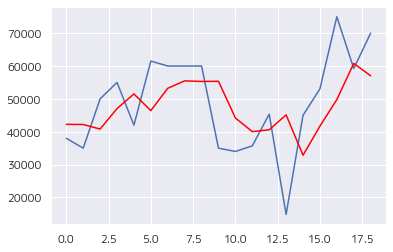

In [103]:
import time
X = df_AZR60_1AZFSE_median_by_month.values
size = int(len(X) * 0.85)
train, test = X[0:size], X[size:len(X)]
print("AAAAAAAA",len(test))
history = [x for x in train]
predictions = list()
# walk-forward validation
t1 = time.time()
for t in range(len(test)):
	model = ARIMA(history, order=(2,0,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
print(time.time() - t1)
rmse = mean_squared_error(test, predictions,squared=False)
mape = mean_absolute_percentage_error(test, predictions)

# rmse = mean_squared_error(np.exp(test), np.exp(predictions),squared=False)
# mape = mean_absolute_percentage_error(np.exp(test), np.exp(predictions))
print('Test RMSE: %.3f' % rmse)
print('Test MAPE: %.3f' % mape)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

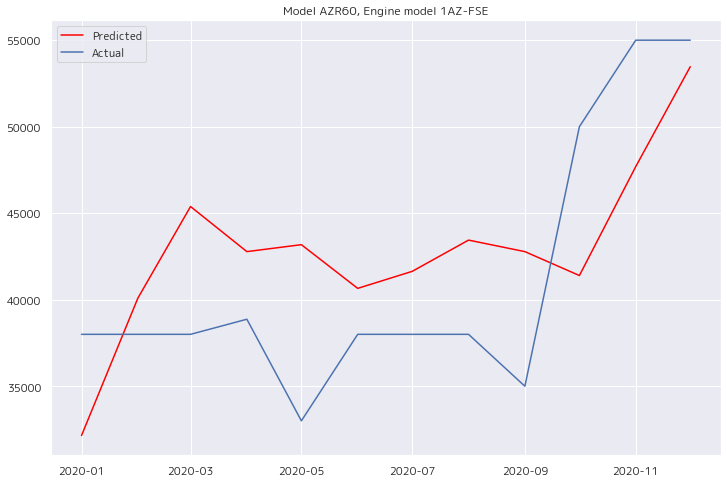

RMSE: 6139.404
MAPE: 0.140




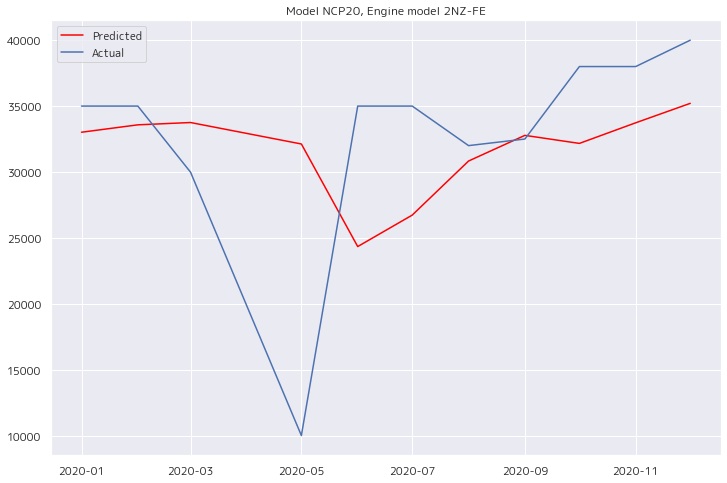

RMSE: 8357.388
MAPE: 0.310




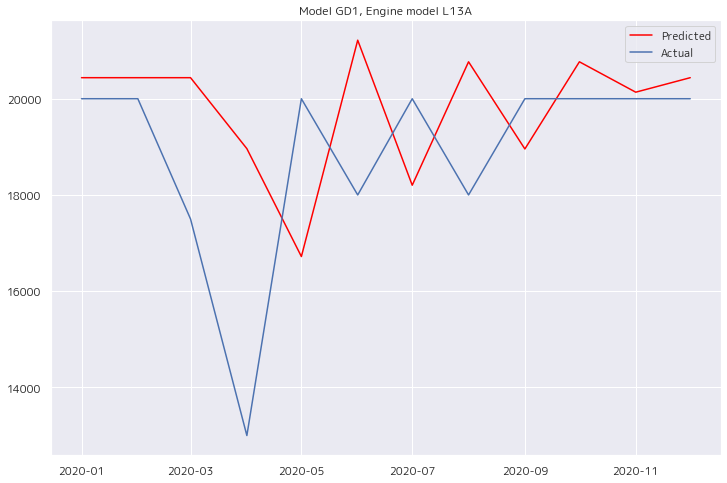

RMSE: 2556.746
MAPE: 0.115




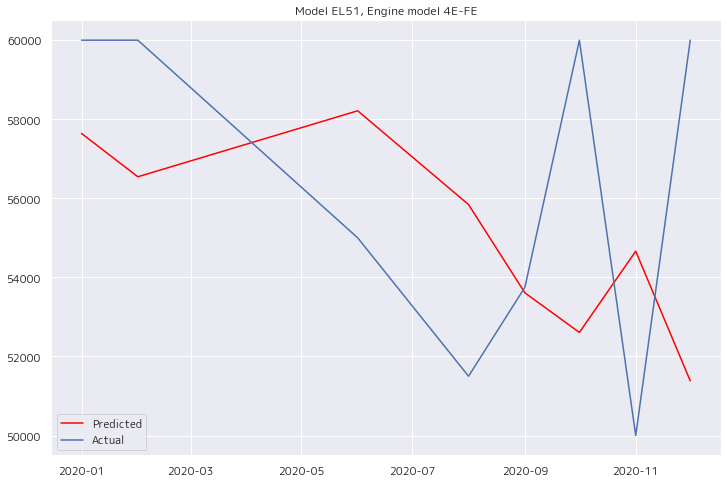

RMSE: 4966.230
MAPE: 0.075




In [156]:
for model, engine in zip(list_much_count_model, list_much_count_engine):
    
    X = globals()[f'df_{model}_{engine.replace("-","")}_median_by_month'].values
    size = int(len(X) * 0.7)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]

    
    model_arima = ARIMA(globals()[f'df_{model}_{engine.replace("-","")}_median_by_month'], order=(3,0,0))
    results = model_arima.fit()
    pred = results.predict(start='2020-01', end = '2020-12', dynamic=False)
    y_forecasted = pred
    y_truth = globals()[f'df_{model}_{engine.replace("-","")}_median_by_month']['2020-01-01': '2020-12-01']
    rmse = mean_squared_error(y_truth, y_forecasted,squared=False)
    mape = mean_absolute_percentage_error(y_truth, y_forecasted)
    
    # plot forecasts against actual outcomes
    plt.figure(figsize=(12,8))
#     plt.plot(y_truth, color='red')
    plt.plot(y_forecasted,color = 'red',label='Predicted')
    plt.plot(y_truth,label='Actual')
    plt.title("Model {0}, Engine model {1}".format(model, engine))
    plt.legend()
    plt.show()
    print('RMSE: %.3f' % rmse)
    print('MAPE: %.3f' % mape)
    print("\n")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


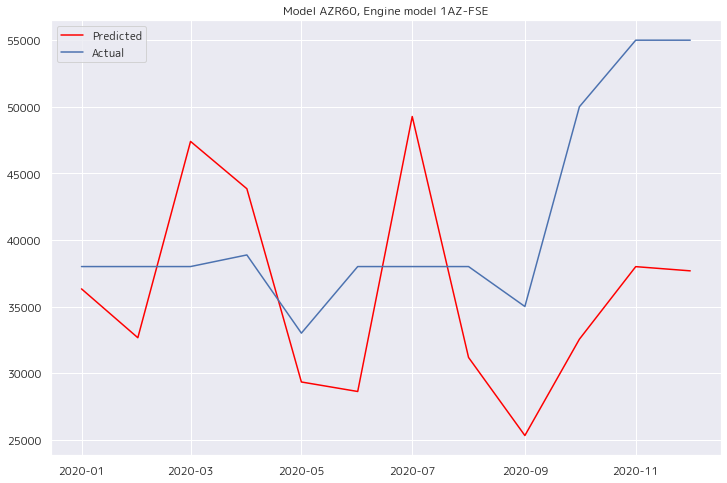

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 10829.299
MAPE: 0.220




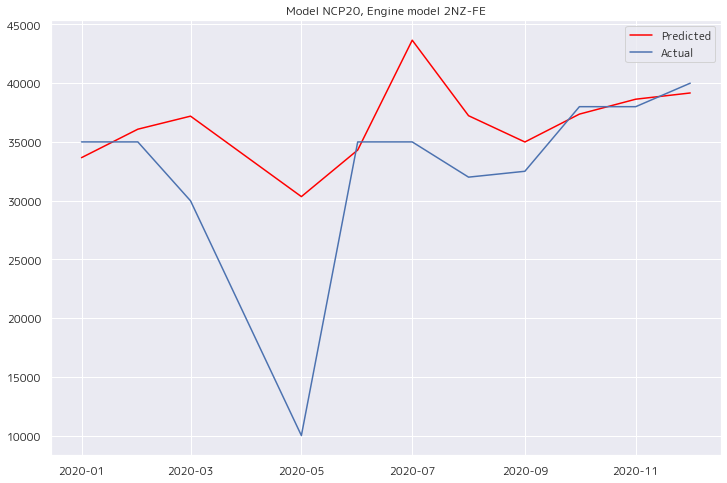

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 7257.301
MAPE: 0.264




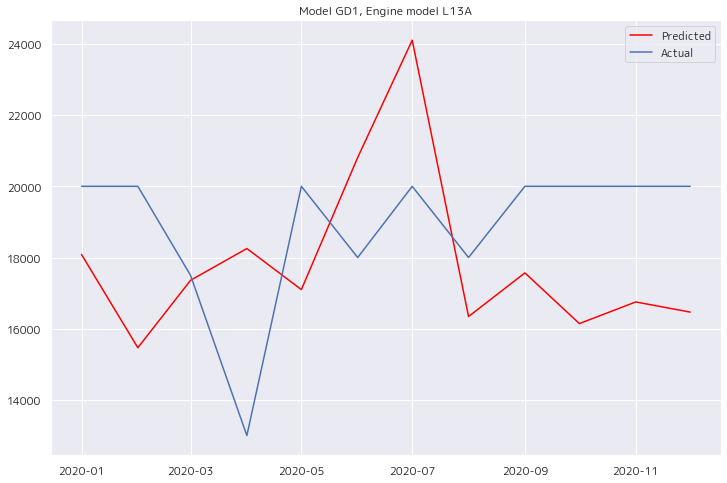

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 3311.018
MAPE: 0.166




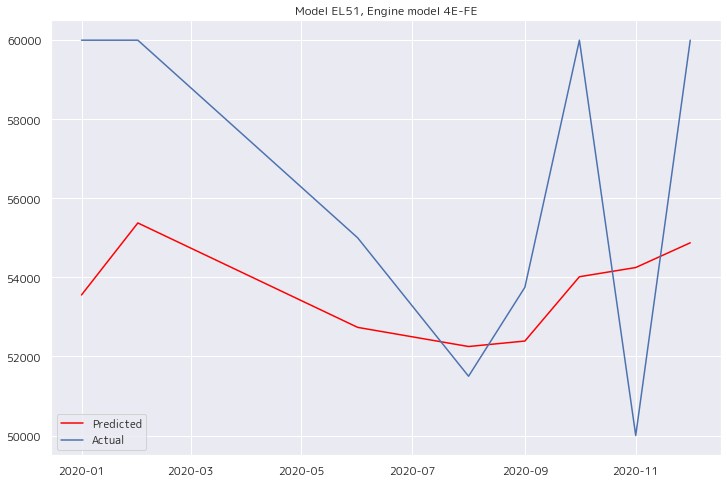

RMSE: 4338.268
MAPE: 0.067




In [158]:
for model, engine in zip(list_much_count_model, list_much_count_engine):
    
    X = globals()[f'df_{model}_{engine.replace("-","")}_median_by_month']
    size = int(len(X) * 0.7)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]

    
    model_prophet = Prophet()
    results = model_prophet.fit( globals()[f'df_{model}_{engine.replace("-","")}_median_by_month'].reset_index().rename(columns={'date_time':'ds','Đơn giá bán hàng_売上単価':'y'}))
   
    future = np.array(list(globals()[f'df_{model}_{engine.replace("-","")}_median_by_month']['2020-01-01':'2020-12-01'].index))
    future = pd.DataFrame(future)
    future.columns = ['ds']
    future['ds']= pd.to_datetime(future['ds'])
    pred = results.predict(future)
    
    y_forecasted = pred['yhat'].values
#     print(len(y_forecasted))
    y_truth = globals()[f'df_{model}_{engine.replace("-","")}_median_by_month']['2020-01-01':'2020-12-01']
#     print(len(y_truth))
    rmse = mean_squared_error(y_truth, y_forecasted,squared=False)
    mape = mean_absolute_percentage_error(y_truth, y_forecasted)
    
    # plot forecasts against actual outcomes
    plt.figure(figsize=(12,8))
    plt.plot(pred[['ds','yhat']].set_index(['ds']),color='red',label='Predicted')
    plt.plot(y_truth,label='Actual')
    plt.title("Model {0}, Engine model {1}".format(model, engine))
    plt.legend()
    plt.show()
    print('RMSE: %.3f' % rmse)
    print('MAPE: %.3f' % mape)
    print("\n")

In [49]:
from kats.utils.backtesters import BackTesterSimple
from kats.models.arima import ARIMAModel, ARIMAParams

backtester_errors = {}

In [66]:
params_prophet = ProphetParams(seasonality_mode='multiplicative') # additive mode gives worse results

backtester_prophet = BackTesterSimple(
    error_methods=ALL_ERRORS,
    data=df_AZR60_1AZFSE_median_by_month_ts,
    params=params_prophet,
    train_percentage=75,
    test_percentage=25, 
    model_class=ProphetModel)

backtester_prophet.run_backtest()

backtester_errors['prophet'] = {}
for error, value in backtester_prophet.errors.items():
    backtester_errors['prophet'][error] = value

INFO:root:Initializing train/test percentages
INFO:root:Calling parent class constructor
INFO:root:Inferring frequency
INFO:root:Instantiated BackTester
INFO:root:Model type: <class 'kats.models.prophet.ProphetModel'>
INFO:root:Error metrics: ['mape', 'smape', 'mae', 'mase', 'mse', 'rmse']
INFO:root:Creating train test splits
INFO:root:Creating TimeSeries train test objects for split
INFO:root:Train split of 0, 90
INFO:root:Test split of 90, 120
INFO:root:Training model
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:root:Fitted Prophet model. 
INFO:root:Making forecast prediction
INFO:root:Generated forecast data from Prophet model.
INFO:root:Calculating Errors
INFO:root:Calculating MAPE
INFO:root:Calculating SMAPE
INFO:root:Calculating MAE
INFO:root:Calculating MASE
INFO:root:Calculating MSE
INFO:root:Calculating RMSE
INFO:

In [79]:
np.array(list(df_AZR60_1AZFSE_median_by_month['2020-01-01':'2020-12-01'].index))

array([Timestamp('2020-01-01 00:00:00'), Timestamp('2020-02-01 00:00:00'),
       Timestamp('2020-03-01 00:00:00'), Timestamp('2020-04-01 00:00:00'),
       Timestamp('2020-05-01 00:00:00'), Timestamp('2020-06-01 00:00:00'),
       Timestamp('2020-07-01 00:00:00'), Timestamp('2020-08-01 00:00:00'),
       Timestamp('2020-09-01 00:00:00'), Timestamp('2020-10-01 00:00:00'),
       Timestamp('2020-11-01 00:00:00'), Timestamp('2020-12-01 00:00:00')],
      dtype=object)

# Super Learning 

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from mlens.ensemble import SuperLearner

[MLENS] backend: threading


In [13]:
# create a list of base-models
def get_models():
	models = list()
	models.append(LinearRegression())
	models.append(ElasticNet())
	models.append(SVR(gamma='scale'))
	models.append(DecisionTreeRegressor())
	models.append(KNeighborsRegressor())
	models.append(AdaBoostRegressor())
	models.append(BaggingRegressor(n_estimators=10))
	models.append(RandomForestRegressor(n_estimators=10))
	models.append(ExtraTreesRegressor(n_estimators=10))
	return models
 
# collect out of fold predictions form k-fold cross validation
def get_out_of_fold_predictions(X, y, models):
	meta_X, meta_y = list(), list()
	# define split of data
	kfold = KFold(n_splits=10, shuffle=True)
	# enumerate splits
	for train_ix, test_ix in kfold.split(X):
		fold_yhats = list()
		# get data
		train_X, test_X = X[train_ix], X[test_ix]
		train_y, test_y = y[train_ix], y[test_ix]
		meta_y.extend(test_y)
		# fit and make predictions with each sub-model
		for model in models:
			model.fit(train_X, train_y)
			yhat = model.predict(test_X)
			# store columns
			fold_yhats.append(yhat.reshape(len(yhat),1))
		# store fold yhats as columns
		meta_X.append(hstack(fold_yhats))
	return vstack(meta_X), asarray(meta_y)
 # fit all base models on the training dataset
def fit_base_models(X, y, models):
	for model in models:
		model.fit(X, y)
 # fit a meta model
def fit_meta_model(X, y):
	model = LinearRegression()
	model.fit(X, y)
	return model
 
# evaluate a list of models on a dataset
def evaluate_models(X, y, models):
	for model in models:
		yhat = model.predict(X)
		mse = mean_squared_error(y, yhat)
		print('%s: RMSE %.3f' % (model.__class__.__name__, sqrt(mse)))
 # make predictions with stacked model
def super_learner_predictions(X, models, meta_model):
	meta_X = list()
	for model in models:
		yhat = model.predict(X)
		meta_X.append(yhat.reshape(len(yhat),1))
	meta_X = hstack(meta_X)
	# predict
	return meta_model.predict(meta_X)

In [172]:
# # create the super learner
# def get_super_learner(X):
#     ensemble = SuperLearner(scorer=rmse, folds=10, shuffle=True, sample_size=len(X))
#     # add base models
#     models = get_models()
#     ensemble.add(models)
#     # add the meta model
#     ensemble.add_meta(LinearRegression())
#     return ensemble

In [ ]:
# ensemble = get_super_learner(X)
# # print(ensemble)
# # fit the super learner
# print('Train', X_train.shape, y_train.shape, 'Test', X_test.shape, y_test.shape)

# ensemble.fit(X_train.to_numpy(), y_train.to_numpy())
# # summarize base learners
# print(ensemble.data)
# # evaluate meta model
# yhat = ensemble.predict(X_test)
# print('Super Learner: RMSE %.3f' % (rmse(y_val, yhat)))
# create the inputs and outputs
# X, y = make_regression(n_samples=1000, n_features=100, noise=0.5)
# split
# X, X_val, y, y_val = train_test_split(X, y, test_size=0.50)
print('Train', X_train.to_numpy().shape, y_train.to_numpy().shape, 'Test', X_test.to_numpy().shape, y_test.to_numpy().shape)
# get models
models = get_models()
# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(X_train.to_numpy(), y_train.to_numpy(), models)
print('Meta ', meta_X.shape, meta_y.shape)
# fit base models
t1 = time.time()
fit_base_models(X_train.to_numpy(), y_train.to_numpy(), models)
# fit the meta model
print("Time fit base model: ",time.time() - t1)
t2 = time.time()
meta_model = fit_meta_model(meta_X, meta_y)
print("Time fit meta model: ",time.time() - t2)
# evaluate base models
# evaluate_models(X_val, y_val, models)
evaluate_models(X_test.to_numpy(), y_test.to_numpy(), models)
# evaluate meta model
# yhat = super_learner_predictions(X_val, models, meta_model)
yhat = super_learner_predictions(X_test.to_numpy(), models, meta_model)
# print('Super Learner: RMSE %.3f' % (sqrt(mean_squared_error(y_val, yhat))))
print('Super Learner: RMSE %.3f , MAPE %.3f' % (sqrt(mean_squared_error(y_test.to_numpy(), yhat)),mean_absolute_percentage_error(y_test.to_numpy(), yhat)))
# print('Super Learner: MAPE %.3f' % (sqrt(mean_absolute_percentage_error(y_test.to_numpy(), yhat))))

Train (217844, 8) (217844,) Test (15349, 8) (15349,)


In [14]:
X_train

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Quốc gia_国,Tháng bán hàng_売上月,median,median_auction,Năm bán hàng_売上年
0,0,3916,226,49,2,35000.000000,51250.000000,2010
1,0,3916,1363,51,7,60000.000000,128500.000000,2009
2,0,3916,317,3,1,35000.000000,42000.000000,2009
3,0,227,463,3,1,35000.000000,49250.000000,2009
4,0,3916,254,34,3,75000.000000,75250.000000,2010
...,...,...,...,...,...,...,...,...
244310,0,3916,310,26,4,35000.000000,50750.000000,2009
244311,0,3916,346,26,4,28000.000000,23000.000000,2009
244312,0,3916,395,25,6,45000.000000,61155.000000,2009
244313,0,3916,918,26,4,38000.000000,33861.000000,2009
